# EDA Group Case Study

This case study is regarding finance and banking services.

The Loan providing companies are facing difficulties in providing loans because of either in-sufficient or non-existing credit history. Some customer take undue advantage and become defaulters.

We have been given the data set, to analyse the previous and present applications submitted by customers, and conclude whether the customer is capable of re-paying the loan amount or not.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.


## Analysis of Application_Data

#### Reading Data from csv

In [1]:
# Filtering out the warnings
import warnings 
warnings.filterwarnings('ignore')

# Importing the required libraries
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
application = pd.read_csv(r'C:\Users\HP\Downloads\Python Upgrad\Anaconda Jupyter\application_data.csv')
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
application.shape

(307511, 122)

Inspecting Data set

In [4]:
# Describing the application data set
application.describe(include = 'all')

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,278232,202448,202924,213312,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,278180.518577,0.080729,NaN,NaN,NaN,NaN,0.417052,1.687979e+05,5.990260e+05,27108.573909,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,NaN,NaN,NaN,NaN,0.722121,2.371231e+05,4.024908e+05,14493.737315,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,1615.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,16524.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.471500e+05,5.135310e+05,24903.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,8.086500e+05,34596.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


#### Checking Distribution of Target Variable

In [5]:
defaulters=application[application.TARGET==1]
nondefaulters=application[application.TARGET==0]

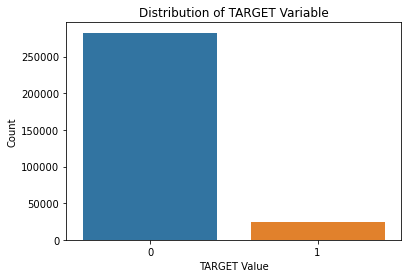

In [6]:
sns.countplot(application.TARGET)
plt.xlabel("TARGET Value")
plt.ylabel("Count")
plt.title("Distribution of TARGET Variable")
plt.show()

- More than 25000 loans were repaid, Less than 5000 loans were not repaid.
- Lets calculate the imbalance percentage

In [7]:
percent_deft=(len(defaulters)*100)/len(application)
percent_nondeft=(len(nondefaulters)*100)/len(application)

print("The Percentage of people who have paid their loan is:",round(percent_nondeft,2),"%")
print("The Percentage of people who have NOT paid their loan is:",round(percent_deft,2),"%")
print("The Ratio of Data Imbalance is:",round(len(nondefaulters)/len(defaulters),2))

The Percentage of people who have paid their loan is: 91.93 %
The Percentage of people who have NOT paid their loan is: 8.07 %
The Ratio of Data Imbalance is: 11.39


#### Identifying missing values in each column

In [80]:
#Function to calculate meta-data to identify % of data is missing in each column
def data_structure(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    unique = data.nunique()
    datatypes = data.dtypes
    return pd.concat([total, percent, unique, datatypes], axis=1, keys=['Total', 'Percent', 'Unique', 'Data_Type']).sort_values(by="Percent", ascending=False)

In [9]:
#calculating meta-data for application_data
app_meta_data=data_structure(application)
app_meta_data.head(20)

,Total,Percent,Unique,Data_Type
COMMONAREA_MEDI,214865,69.872297,3202,float64
COMMONAREA_AVG,214865,69.872297,3181,float64
COMMONAREA_MODE,214865,69.872297,3128,float64
NONLIVINGAPARTMENTS_MODE,213514,69.432963,167,float64
NONLIVINGAPARTMENTS_AVG,213514,69.432963,386,float64
NONLIVINGAPARTMENTS_MEDI,213514,69.432963,214,float64
FONDKAPREMONT_MODE,210295,68.386172,4,object
LIVINGAPARTMENTS_MODE,210199,68.354953,736,float64
LIVINGAPARTMENTS_AVG,210199,68.354953,1868,float64
LIVINGAPARTMENTS_MEDI,210199,68.354953,1097,float64


In [79]:
#dropping columns with more than 57% missing values 
#Selected 57% because we don't want to drop EXT_SOURCE_1 which is an important variable
col_to_keep=list(app_meta_data[(app_meta_data.Percent<57)].index)
application=application[col_to_keep]
application.describe()

,EXT_SOURCE_1,NONLIVINGAREA_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,ELEVATORS_MEDI,ELEVATORS_AVG,ELEVATORS_MODE,APARTMENTS_MEDI,APARTMENTS_AVG,APARTMENTS_MODE,...,TARGET,HOUR_APPR_PROCESS_START,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,SK_ID_CURR
count,115607.000000,118410.000000,118410.000000,118410.000000,123366.000000,123366.000000,123366.000000,130309.000000,130309.000000,130309.000000,...,270624.000000,270624.000000,270624.000000,270624.000000,270624.000000,270624.000000,219590.000000,270624.000000,270624.000000,270624.000000
mean,0.493730,0.025932,0.027082,0.027025,0.073317,0.074081,0.070104,0.115014,0.114548,0.111673,...,0.083533,12.012708,2.055180,2.074458,-2997.649765,-5021.699129,-2353.333813,-16046.146639,0.020292,278222.590812
std,0.211164,0.067455,0.066576,0.067244,0.129362,0.129465,0.127504,0.106112,0.105278,0.105172,...,0.276686,3.241123,0.486824,0.492636,1505.851477,3533.072076,2333.721637,4426.039165,0.012984,102802.665668
min,0.014568,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,-7197.000000,-24672.000000,-17912.000000,-25201.000000,0.000290,100002.000000
25%,0.324637,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056200,0.055700,0.050400,...,0.000000,10.000000,2.000000,2.000000,-4297.000000,-7526.000000,-3126.000000,-19768.000000,0.010006,189132.750000
50%,0.494905,0.000800,0.003200,0.002800,0.000000,0.000000,0.000000,0.084300,0.085100,0.084000,...,0.000000,12.000000,2.000000,2.000000,-3264.000000,-4531.000000,-1612.000000,-15746.000000,0.018850,278275.500000
75%,0.666356,0.022000,0.026100,0.025200,0.120000,0.120000,0.080600,0.145700,0.146400,0.138700,...,0.000000,14.000000,2.000000,2.000000,-1726.000000,-2055.000000,-749.000000,-12338.000000,0.026392,367103.250000
max,0.951624,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,23.000000,3.000000,3.000000,0.000000,0.000000,0.000000,-7489.000000,0.072508,456254.000000


#### Checking columns with very less missing values

In [11]:
#Checking columns with very less missing values
low_missing=pd.DataFrame(app_meta_data[(app_meta_data.Percent>0)&(app_meta_data.Percent<15)])
low_missing

,Total,Percent,Unique,Data_Type
AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.501631,5,float64
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631,9,float64
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631,9,float64
AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631,24,float64
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631,11,float64
AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.501631,25,float64
NAME_TYPE_SUITE,1292,0.420148,7,object
OBS_30_CNT_SOCIAL_CIRCLE,1021,0.332021,33,float64
DEF_30_CNT_SOCIAL_CIRCLE,1021,0.332021,10,float64
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.332021,33,float64


#### Treating columns with low null valus

1. AMT_REQ_CREDIT_BUREAU_HOUR
2. AMT_REQ_CREDIT_BUREAU_DAY
3. AMT_REQ_CREDIT_BUREAU_WEEK
4. AMT_REQ_CREDIT_BUREAU_MON
5. AMT_REQ_CREDIT_BUREAU_QRT
6. AMT_REQ_CREDIT_BUREAU_YEAR

- We can impute missing values in these columns above with 0s and assume that no enquiry was made during the time reflected in null rows.


1. NAME_TYPE_SUITE - we should leave empty values as it is or impute it with "Others A" or "Others B" depending on what they mean.
2. OBS_30_CNT_SOCIAL_CIRCLE & related fields. 
3. EXT_SOURCE_2 
4. AMT_GOODS_PRICE 
5. CNT_FAM_MEMBERS
6. AMT_ANNUITY
7. DAYS_LAST_PHONE_CHANGE

In the dataset, we also have a lot of flag columnsw which are of no use in bivariate analysis, as they are 'int' type columns. These can be converted to Yes/No values for categorical analysis.

In [12]:
#columns to convert
cols_to_convert=list(app_meta_data[(app_meta_data.Unique==2)&(app_meta_data.Data_Type=="int64")].index)

#function to conver columns
def convert_data(application, cols_to_convert):
    for y in cols_to_convert:
        application.loc[:,y].replace((0, 1), ('N', 'Y'), inplace=True)
    return application

#calling the function for application_data
convert_data(application, cols_to_convert)
application.TARGET.replace(('N', 'Y'), (0, 1), inplace=True)
application.dtypes.value_counts()

object     47
float64    43
int64       9
dtype: int64

### Univariate Analyis on Categorical Columns

In [13]:
defaulters=application[application.TARGET==1]

nondefaulters=application[application.TARGET==0]

**Getting a list of columns with dtype=object, to identify columns for categorical analysis**

In [14]:
application.select_dtypes('object').columns

Index(['WALLSMATERIAL_MODE', 'HOUSETYPE_MODE', 'EMERGENCYSTATE_MODE',
       'OCCUPATION_TYPE', 'NAME_TYPE_SUITE', 'FLAG_DOCUMENT_8',
       'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_21', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_OWN_REALTY', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_12', 'FLAG_PHONE', 'LIVE_CITY_NOT_WORK_CITY',
       'REG_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_WORK_REGION',
       'REG_REGION_NOT_LIVE_REGION', 'WEEKDAY_APPR_PROCESS_START',
       'FLAG_EMAIL', 'FLAG_CONT_MOBILE', 'ORGANIZATION_TYPE',
       'FLAG_WORK_PHONE', 'FLAG_EMP_PHONE', 'FLAG_MOBIL', 'NAME_HOUS

In [15]:
## FUNCTION TO PLOT CHARTS

def plot_charts(var, label_rotation,horizontal_layout):
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15,20))
    
    s1=sns.countplot(ax=ax1,x=defaulters[var], data=defaulters, order= defaulters[var].value_counts().index,)
    ax1.set_title('Distribution of '+ '%s' %var +' for Defaulters', fontsize=10)
    ax1.set_xlabel('%s' %var)
    ax1.set_ylabel("Count of Loans")
    if(label_rotation):
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    s2=sns.countplot(ax=ax2,x=nondefaulters[var], data=nondefaulters, order= nondefaulters[var].value_counts().index,)
    if(label_rotation):
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
    ax2.set_xlabel('%s' %var)
    ax2.set_ylabel("Count of Loans")
    ax2.set_title('Distribution of '+ '%s' %var +' for Non-Defaulters', fontsize=10)
    plt.show()

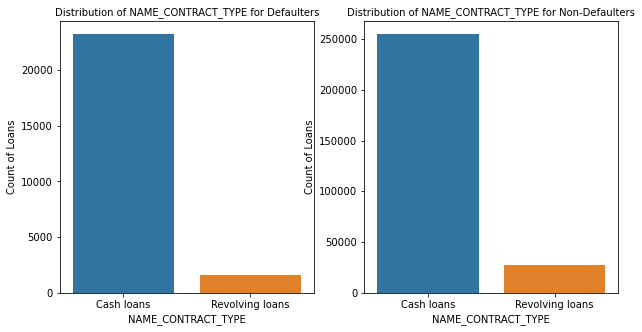

In [16]:
plot_charts('NAME_CONTRACT_TYPE', label_rotation=False,horizontal_layout=True)

- We observe that the number of **Cash loans** is much higher than the number of **Revolving loans** for both Target = 0 and Target = 1

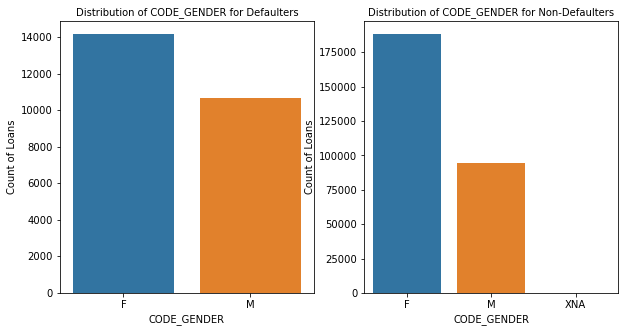

In [17]:
plot_charts('CODE_GENDER', label_rotation=False,horizontal_layout=True)

- We observe that the number of **Females** taking loans is much higher than the number of **Males** for both Target = 0 and Target = 1

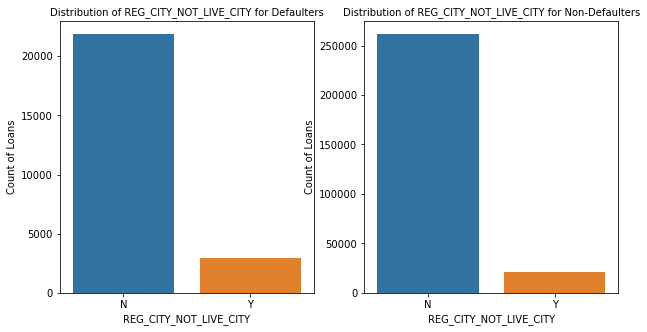

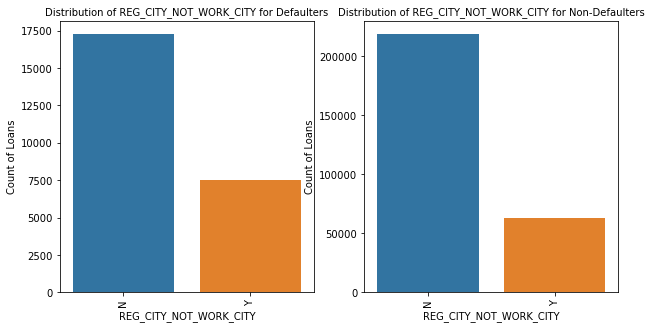

In [18]:
plot_charts('REG_CITY_NOT_LIVE_CITY', label_rotation=False,horizontal_layout=True)
plot_charts('REG_CITY_NOT_WORK_CITY', label_rotation=True,horizontal_layout=True)

- We observe that the Ratio of people whose **Registration City is not the same as live city or work city** is higher in case of defaulters are compared to defaulters.

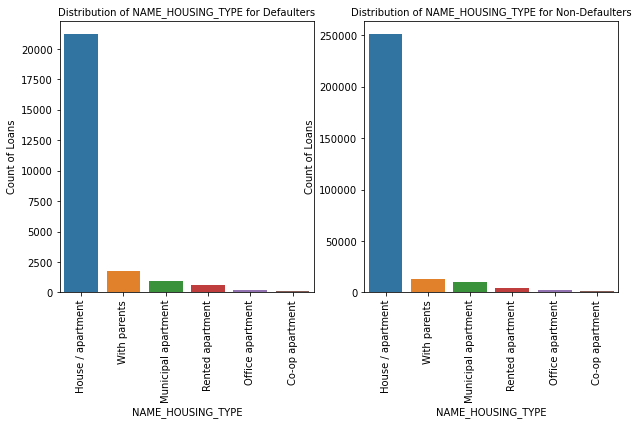

In [19]:
plot_charts('NAME_HOUSING_TYPE', label_rotation=True,horizontal_layout=True)

- Most people live in a House/Apartment
- Ratio of People who live **With Parents** is more for defaulter than non-defaulters. It tells us that applicant who live with parents have a higher chance of having payment difficulties.

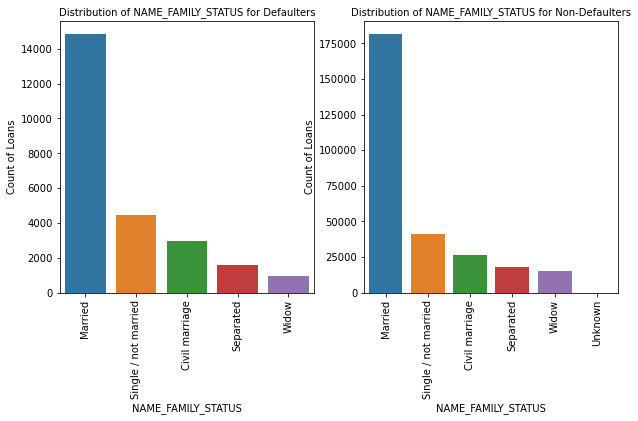

In [20]:
plot_charts('NAME_FAMILY_STATUS', label_rotation=True,horizontal_layout=True)

- Ratio of **Single/Unmarried** people is more in the left graph.
- Single/Unmarried people are more likely to have payment difficulties

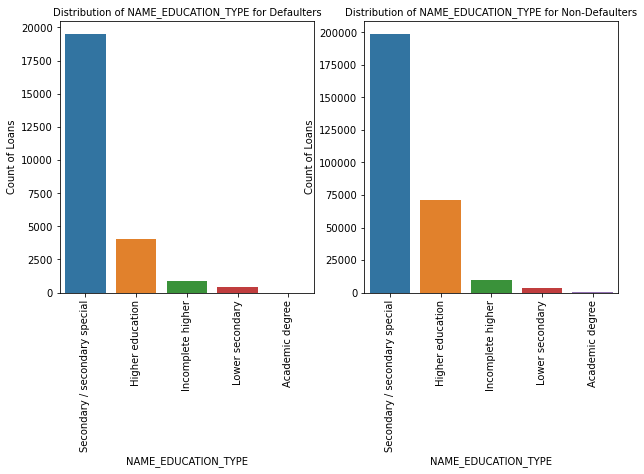

In [21]:
plot_charts('NAME_EDUCATION_TYPE', label_rotation=True,horizontal_layout=True)

- While the category with highest count remains same. 
- We observe that people with Academic Degree rarely take loans and are rarely defaulters.
- People with higher education are less likely to have payment difficulties.
- The Ratio is higher for non-defaulters than defaulters.

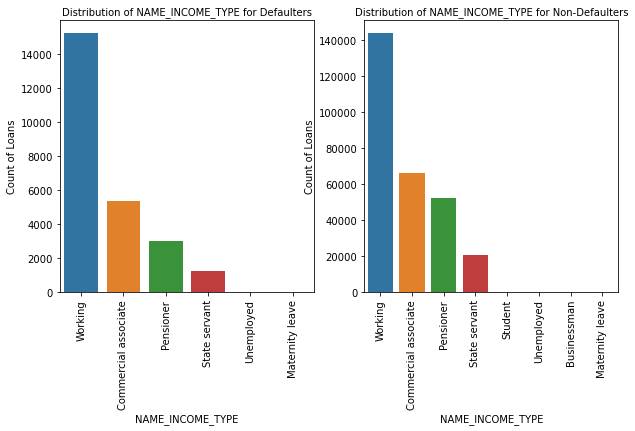

In [22]:
plot_charts('NAME_INCOME_TYPE', label_rotation=True,horizontal_layout=True)

- Commercial associates, Pensioner, State Servants have a higher ratio to total in non-defaulters.

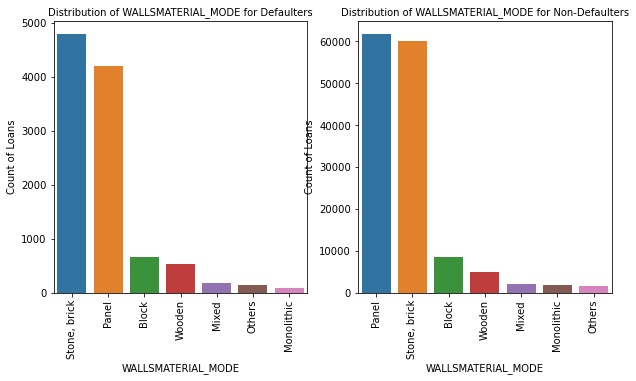

In [23]:
plot_charts('WALLSMATERIAL_MODE', label_rotation=True,horizontal_layout=True)

- Here we have some difference. We can see that most defaulters have houses made of stone and brick while most non-defaulters have houses made of Panel

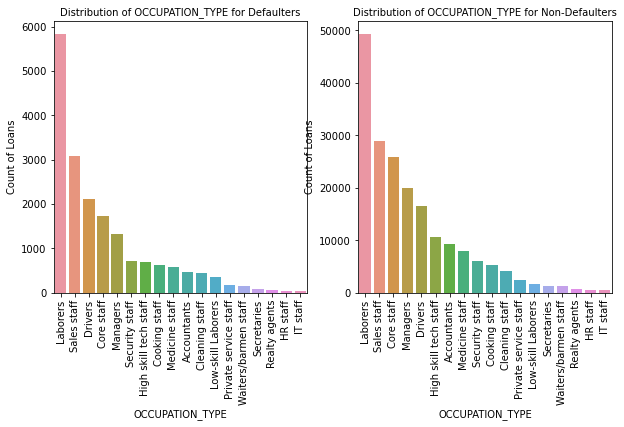

In [25]:
plot_charts('OCCUPATION_TYPE', label_rotation=True,horizontal_layout=True)

### Univariate & Bivariate Analyis on Numeric Columns

### REMOVING OUTLIERS

In [28]:
## FUNCTION FOR PLOTTING BOX PLOT AND HISTOGRAM

def plot_boxhist(var):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    s=sns.boxplot(y=defaulters[var]);
    plt.title('Box Plot of '+ '%s' %var +' for Defaulters', fontsize=10)
    plt.xlabel('%s' %var)
    plt.ylabel("Count of Loans")
    plt.subplot(1, 2, 2)
    s=plt.hist(x=defaulters[var]);
    plt.xlabel('%s' %var)
    plt.ylabel("Count of Loans")
    plt.title('Histogram of '+ '%s' %var +' for Defaulters', fontsize=10)
plt.show()

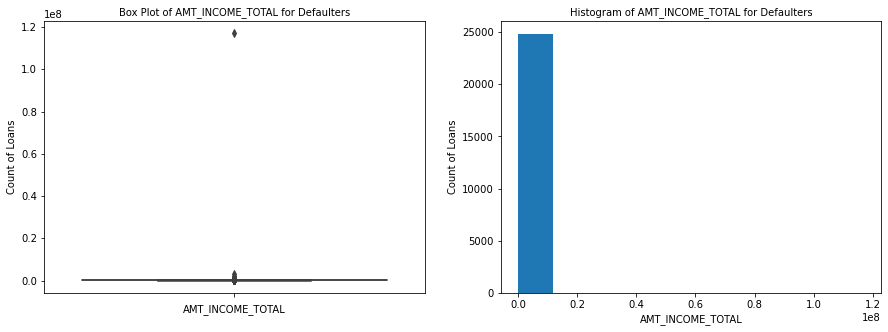

In [29]:
plot_boxhist('AMT_INCOME_TOTAL')

- We can see that there are some outliers and the graph looks like this to accomodate those outliers.

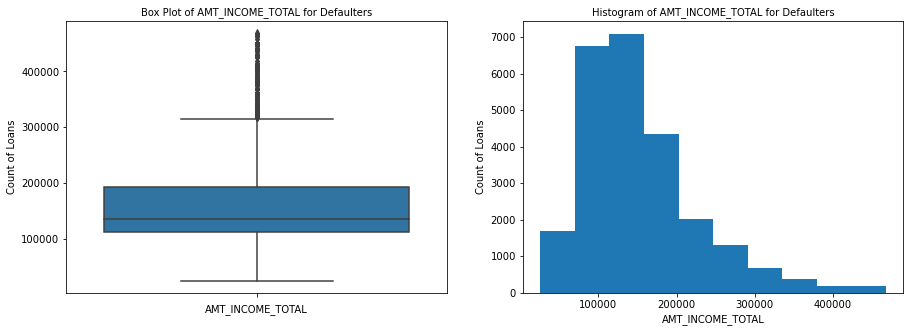

In [30]:
#Removing all entries above 99 percentile
application = application[application.AMT_INCOME_TOTAL<np.nanpercentile(application['AMT_INCOME_TOTAL'], 99)]

#update dataframes
defaulters=application[application.TARGET==1] 
nondefaulters=application[application.TARGET==0]

plot_boxhist('AMT_INCOME_TOTAL')

- Here we can infer that most people with payment have incomes in the lower range between 100000 to 200000 with some outliers on both ends

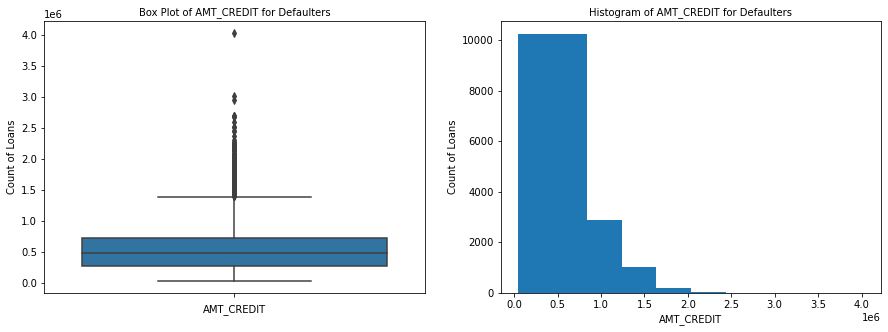

In [31]:
plot_boxhist('AMT_CREDIT')

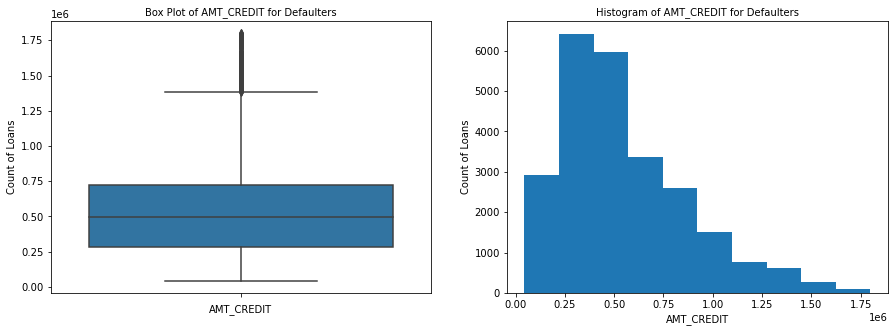

In [32]:
#Removing all entries above 99 percentile
application =application[application.AMT_CREDIT<np.nanpercentile(application['AMT_CREDIT'], 99)]

#update dataframes
defaulters=application[application.TARGET==1] 
nondefaulters=application[application.TARGET==0]

plot_boxhist('AMT_CREDIT')

- we observe that the credit amount lies between 250000 to around 500000 for defaulters

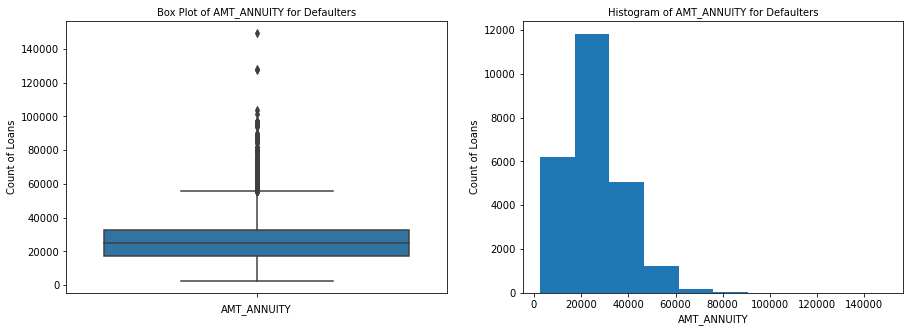

In [33]:
plot_boxhist('AMT_ANNUITY')

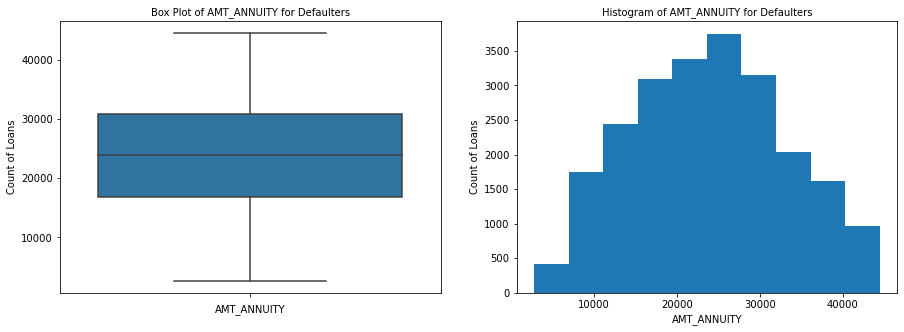

In [34]:
#Removing all entries above 99 percentile
application=application[application.AMT_ANNUITY<np.nanpercentile(application['AMT_ANNUITY'], 90)]

#update dataframes
defaulters=application[application.TARGET==1] 
nondefaulters=application[application.TARGET==0]

plot_boxhist('AMT_ANNUITY')

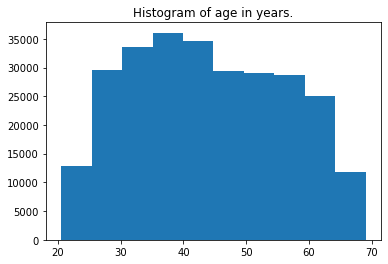

In [35]:
#Deriving new metric Age from Days Birth
application['AGE'] = application['DAYS_BIRTH'] / -365
plt.hist(application['AGE']);
plt.title('Histogram of age in years.');

- Age seems to be fairly distributed

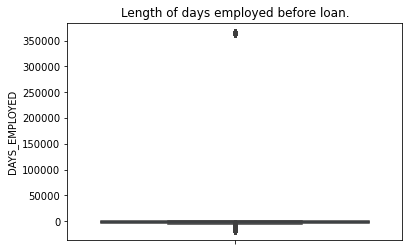

In [36]:
sns.boxplot(y=application['DAYS_EMPLOYED']);
plt.title('Length of days employed before loan.');

In [37]:
application['DAYS_EMPLOYED'].describe()

count    270624.000000
mean      66967.610744
std      143809.691359
min      -17912.000000
25%       -2690.000000
50%       -1165.000000
75%        -258.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

- There is an outlier here. The max value is 365243 days which is not practically possible. We can replace it with null value, as it can be an error also.

In [38]:
application['DAYS_EMPLOYED']=application['DAYS_EMPLOYED'].replace(365243, np.nan)
application['DAYS_EMPLOYED'].describe()

count    219590.000000
mean      -2353.333813
std        2333.721637
min      -17912.000000
25%       -3126.000000
50%       -1612.000000
75%        -749.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

In [39]:
#Deriving variable "Years Employed" from days employed
application['YEARS_EMPLOYED'] = (application['DAYS_EMPLOYED']/-365)

#update dataframes
defaulters=application[application.TARGET==1] 
nondefaulters=application[application.TARGET==0]

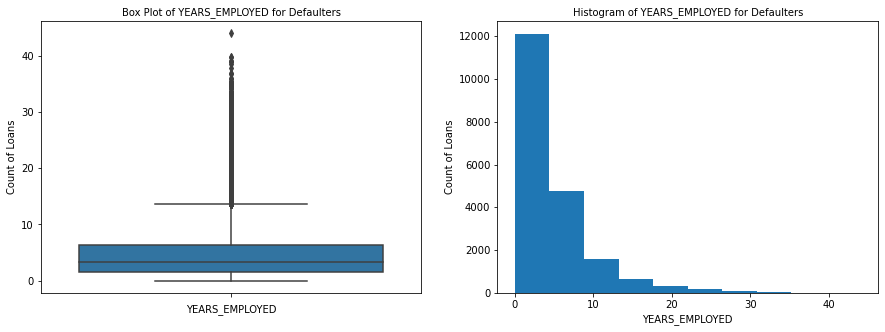

In [40]:
plot_boxhist('YEARS_EMPLOYED')

- A large number of entries have 0 which means, a lot of people don't work.

In [41]:
application.groupby(['NAME_INCOME_TYPE']).agg({'YEARS_EMPLOYED': ['mean', 'median', 'count', 'max'], 'AGE': ['median']})

YEARS_EMPLOYED                                     AGE
                               mean    median   count        max     median
NAME_INCOME_TYPE                                                           
Businessman                5.544292  4.838356       3   7.175342  52.487671
Commercial associate       5.730061  4.010959   58866  48.071233  39.413699
Maternity leave            6.453425  6.260274       4   9.942466  37.649315
Pensioner                 13.550137  7.673973      10  35.246575  60.506849
State servant              9.276139  7.008219   18445  48.172603  40.482192
Student                    6.765582  4.954795      16  21.931507  41.215068
Unemployed                      NaN       NaN       0        NaN  46.832877
Working                    6.377079  4.347945  142246  49.073973  39.679452

- We see that Pensioners comprise a lot of non-working people, which is normal. Working people seemed to have worked for many years.

In [42]:
application.groupby(['NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE']).agg({'AMT_INCOME_TOTAL': ['mean', 'median', 'count', 'max']})

AMT_INCOME_TOTAL            \
                                                               mean    median   
NAME_EDUCATION_TYPE           NAME_INCOME_TYPE                                  
Academic degree               Commercial associate    230700.000000  225000.0   
                              Pensioner               163620.000000  135000.0   
                              State servant           230062.500000  198000.0   
                              Working                 206100.000000  180000.0   
Higher education              Businessman             195000.000000  180000.0   
                              Commercial associate    201003.446086  180000.0   
                              Maternity leave         112500.000000  112500.0   
                              Pensioner               151193.659642  135000.0   
                              State servant           183217.739153  171000.0   
                              Student                 164700.000000  171000.0   
                              Unemployed              204300.000000  225000.0   
                              Working                 173712.264383  157500.0   
Incomplete higher             Commercial associate    182876.896934  164623.5   
                              Pensioner               141442.696352  135000.0   
                              State servant           165287.840000  157500.0   
                              Student                 157500.000000  157500.0   
                              Unemployed              126000.000000   63000.0   
                              Working                 158877.631087  135000.0   
Lower secondary               Commercial associate    157017.140515  135000.0   
                              Pensioner               103467.097166   90000.0   
                              State servant           135703.125000  112500.0   
                              Working                 134821.250000  126000.0   
Secondary / secondary special Commercial associate    167227.792605  157500.0   
                              Maternity leave          58500.000000   58500.0   
                              Pensioner               124717.747472  112500.0   
                              State servant           149828.084681  135000.0   
                              Student                 130050.000000  128250.0   
                              Unemployed               70322.727273   63000.0   
                              Working                 145718.602949  135000.0   

                                                                      
                                                     count       max  
NAME_EDUCATION_TYPE           NAME_INCOME_TYPE                        
Academic degree               Commercial associate      30  450000.0  
                              Pensioner                 20  315000.0  
                              State servant             16  450000.0  
                              Working                   60  450000.0  
Higher education              Businessman                3  225000.0  
                              Commercial associate   17990  468000.0  
                              Maternity leave            2  135000.0  
                              Pensioner               6893  450000.0  
                              State servant           7065  450000.0  
                              Student                    5  225000.0  
                              Unemployed                 5  337500.0  
                              Working                28213  463500.0  
Incomplete higher             Commercial associate    2838  468823.5  
                              Pensioner                466  450000.0  
                              State servant            675  450000.0  
                              Student                    1  157500.0  
                              Unemployed                 3  270000.0  
                              Working 

- We can see that most of the loans are taken by working people with secondary education.

### Binning of Continuous Variables

In [44]:
defaulters.loc[:,'INCOME_BRACKET']=pd.qcut(application.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.10,0.35,0.50,0.90,1], labels=['Very_low','Low','Medium','High','Very_high'])
nondefaulters.loc[:,'INCOME_BRACKET']=pd.qcut(application.loc[:,'AMT_INCOME_TOTAL'],q=[0,0.10,0.35,0.50,0.90,1], labels=['Very_low','Low','Medium','High','Very_high'])

In [45]:
defaulters.loc[:,'Rating1']=pd.cut(application.loc[:,'EXT_SOURCE_1'],[0,0.10,0.35,0.50,0.80,1], labels=['Very_low','Low','Medium','High','Very_high'])
nondefaulters.loc[:,'Rating1']=pd.cut(application.loc[:,'EXT_SOURCE_1'],[0,0.10,0.35,0.50,0.80,1], labels=['Very_low','Low','Medium','High','Very_high'])

In [46]:
defaulters.loc[:,'Rating2']=pd.cut(application.loc[:,'EXT_SOURCE_2'],[0,0.10,0.35,0.50,0.80,1], labels=['Very_low','Low','Medium','High','Very_high'])
nondefaulters.loc[:,'Rating2']=pd.cut(application.loc[:,'EXT_SOURCE_2'],[0,0.10,0.35,0.50,0.80,1], labels=['Very_low','Low','Medium','High','Very_high'])

In [47]:
defaulters.loc[:,'Rating3']=pd.cut(application.loc[:,'EXT_SOURCE_3'], [0,0.10,0.35,0.50,0.80,1], labels=['Very_low','Low','Medium','High','Very_high'])
nondefaulters.loc[:,'Rating3']=pd.cut(application.loc[:,'EXT_SOURCE_3'], [0,0.10,0.35,0.50,0.80,1], labels=['Very_low','Low','Medium','High','Very_high'])

In [48]:
defaulters.loc[:,'AMT_ANNUITY_BINS']=pd.qcut(application.loc[:,'AMT_ANNUITY'], [0,0.30,0.50,0.85,0.1], labels=['Low','Medium','High','Very_High'])
nondefaulters.loc[:,'AMT_ANNUITY_BINS']=pd.qcut(application.loc[:,'AMT_ANNUITY'], [0,0.30,0.50,0.85,1], labels=['Low','Medium','High','Very_High'])

In [49]:
age_data = application.loc[:,['TARGET', 'DAYS_BIRTH']]
age_data.loc[:,'YEARS_BIRTH'] = application.loc[:,'DAYS_BIRTH']/ -365
# Bin the age data
age_data.loc[:,'YEARS_BINNED'] = pd.cut(age_data.loc[:,'YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,-9461,25.920548,"(25.0, 30.0]"
1,0,-16765,45.931507,"(45.0, 50.0]"
2,0,-19046,52.180822,"(50.0, 55.0]"
3,0,-19005,52.068493,"(50.0, 55.0]"
4,0,-19932,54.608219,"(50.0, 55.0]"
5,0,-16941,46.413699,"(45.0, 50.0]"
6,0,-13778,37.747945,"(35.0, 40.0]"
7,0,-18850,51.643836,"(50.0, 55.0]"
8,0,-20099,55.065753,"(55.0, 60.0]"
9,0,-14469,39.641096,"(35.0, 40.0]"


In [50]:
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123634,-8526.531171,23.360359
"(25.0, 30.0]",0.114012,-10149.579304,27.807067
"(30.0, 35.0]",0.106704,-11852.848779,32.473558
"(35.0, 40.0]",0.092880,-13705.912891,37.550446
"(40.0, 45.0]",0.082295,-15495.702723,42.453980
"(45.0, 50.0]",0.077458,-17326.817002,47.470732
"(50.0, 55.0]",0.069519,-19200.394964,52.603822
"(55.0, 60.0]",0.057357,-20987.323723,57.499517
"(60.0, 65.0]",0.054386,-22782.049911,62.416575


### Analysis of Continuous variables for TARGET=1 and TARGET=0

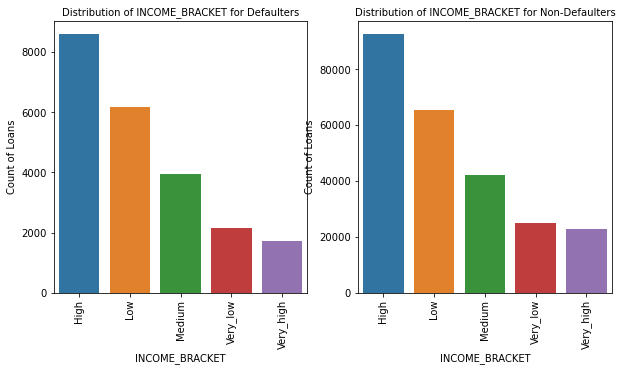

In [51]:
plot_charts('INCOME_BRACKET', label_rotation=True,horizontal_layout=True)

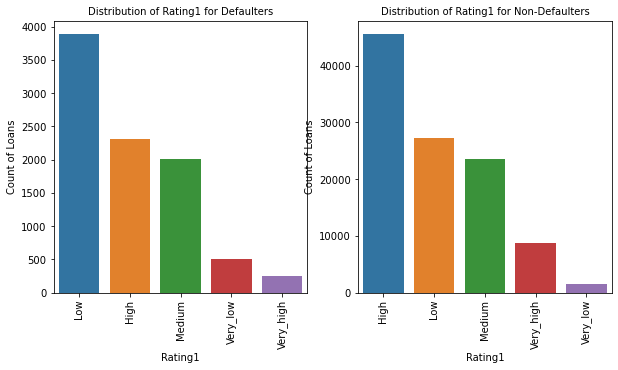

In [52]:
plot_charts('Rating1', label_rotation=True,horizontal_layout=True)

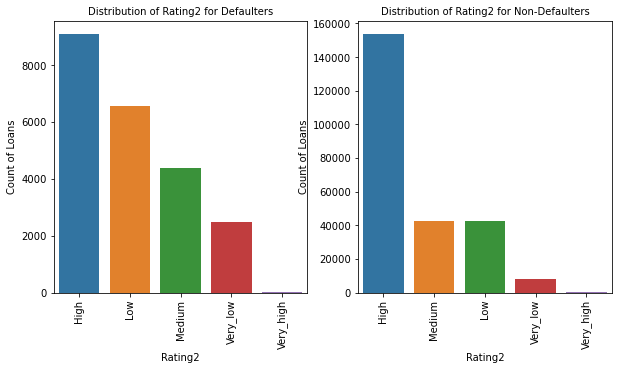

In [53]:
plot_charts('Rating2', label_rotation=True,horizontal_layout=True)

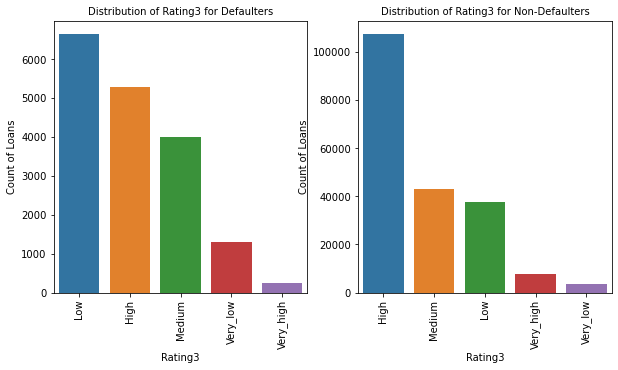

In [54]:
plot_charts('Rating3', label_rotation=True,horizontal_layout=True)

- A very similar trend in all the ratings (rating1,2,3) can be seen i.e. a large number of defaulters have very Low rating, while a large number of non-defaulters have a high rating.

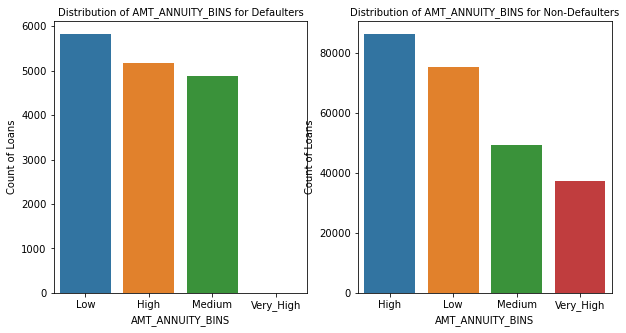

In [55]:
plot_charts('AMT_ANNUITY_BINS', label_rotation=False,horizontal_layout=True)

- maximum number of defaulters have Low_annuity Values, while maximum number of non-defaulters have high annuity

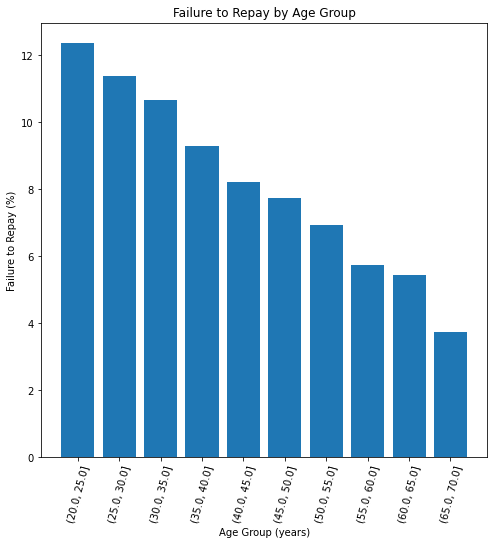

In [56]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

> Maximum Failure to Repay is in Age Group 20-25

###  Bi-Variate Analysis of Variables

In [57]:
#selecting columns for correlation, removing cols for floor and house ec

cols=['EXT_SOURCE_1', 'EXT_SOURCE_3', 'EXT_SOURCE_2',
       'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_FAM_MEMBERS',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_CREDIT', 'AMT_INCOME_TOTAL',
       'DAYS_REGISTRATION', 'REGION_POPULATION_RELATIVE','CNT_CHILDREN', 'HOUR_APPR_PROCESS_START',
       'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT',
       'DAYS_ID_PUBLISH', 'DAYS_EMPLOYED', 'DAYS_BIRTH']

In [58]:
defaulters_1=defaulters[cols]
defaulters_correlation = defaulters_1.corr()
round(defaulters_correlation, 3)

,EXT_SOURCE_1,EXT_SOURCE_3,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT,AMT_INCOME_TOTAL,DAYS_REGISTRATION,REGION_POPULATION_RELATIVE,CNT_CHILDREN,HOUR_APPR_PROCESS_START,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_ID_PUBLISH,DAYS_EMPLOYED,DAYS_BIRTH
EXT_SOURCE_1,1.000,0.141,0.168,0.173,0.078,-0.056,-0.133,0.163,0.054,-0.161,0.074,-0.092,0.013,-0.059,-0.063,-0.122,-0.227,-0.580
EXT_SOURCE_3,0.141,1.000,0.077,0.080,0.030,-0.021,-0.066,0.079,-0.071,-0.086,-0.007,-0.020,-0.046,0.001,0.003,-0.128,-0.090,-0.175
EXT_SOURCE_2,0.168,0.077,1.000,0.107,0.081,0.000,-0.207,0.096,0.124,-0.068,0.157,-0.013,0.130,-0.236,-0.238,-0.061,-0.095,-0.109
AMT_GOODS_PRICE,0.173,0.080,0.107,1.000,0.741,0.048,-0.114,0.978,0.277,-0.038,0.060,-0.008,0.039,-0.053,-0.047,-0.056,-0.115,-0.144
AMT_ANNUITY,0.078,0.030,0.081,0.741,1.000,0.075,-0.071,0.757,0.341,0.031,0.032,0.031,0.021,-0.044,-0.034,-0.014,-0.047,-0.016
CNT_FAM_MEMBERS,-0.056,-0.021,0.000,0.048,0.075,1.000,-0.012,0.052,-0.002,0.146,-0.033,0.884,-0.026,0.052,0.045,-0.025,-0.003,0.208
DAYS_LAST_PHONE_CHANGE,-0.133,-0.066,-0.207,-0.114,-0.071,-0.012,1.000,-0.104,-0.082,0.070,-0.055,0.010,-0.021,0.018,0.017,0.128,0.169,0.111
AMT_CREDIT,0.163,0.079,0.096,0.978,0.757,0.052,-0.104,1.000,0.279,-0.038,0.053,0.000,0.025,-0.047,-0.039,-0.052,-0.108,-0.143
AMT_INCOME_TOTAL,0.054,-0.071,0.124,0.277,0.341,-0.002,-0.082,0.279,1.000,0.033,0.092,-0.007,0.077,-0.161,-0.148,-0.002,-0.027,0.004
DAYS_REGISTRATION,-0.161,-0.086,-0.068,-0.038,0.031,0.146,0.070,-0.038,0.033,1.000,-0.055,0.149,-0.031,0.105,0.107,0.101,0.138,0.293


In [60]:
c1=defaulters_correlation.unstack()
c1.sort_values(ascending=False).drop_duplicates().head(10)

DAYS_BIRTH                   DAYS_BIRTH              1.000000
AMT_CREDIT                   AMT_GOODS_PRICE         0.978079
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT    0.961097
CNT_CHILDREN                 CNT_FAM_MEMBERS         0.883502
AMT_CREDIT                   AMT_ANNUITY             0.756598
AMT_GOODS_PRICE              AMT_ANNUITY             0.741243
AMT_INCOME_TOTAL             AMT_ANNUITY             0.340531
DAYS_EMPLOYED                DAYS_BIRTH              0.307737
DAYS_REGISTRATION            DAYS_BIRTH              0.292698
AMT_CREDIT                   AMT_INCOME_TOTAL        0.278920
dtype: float64

In [61]:
c1.sort_values(ascending=False).drop_duplicates().tail(10)

EXT_SOURCE_3                 DAYS_BIRTH                    -0.174677
EXT_SOURCE_2                 DAYS_LAST_PHONE_CHANGE        -0.207268
EXT_SOURCE_1                 DAYS_EMPLOYED                 -0.226605
EXT_SOURCE_2                 REGION_RATING_CLIENT_W_CITY   -0.236492
                             REGION_RATING_CLIENT          -0.238035
HOUR_APPR_PROCESS_START      REGION_RATING_CLIENT_W_CITY   -0.275065
REGION_RATING_CLIENT         HOUR_APPR_PROCESS_START       -0.291574
REGION_POPULATION_RELATIVE   REGION_RATING_CLIENT          -0.417374
REGION_RATING_CLIENT_W_CITY  REGION_POPULATION_RELATIVE    -0.421099
EXT_SOURCE_1                 DAYS_BIRTH                    -0.579984
dtype: float64

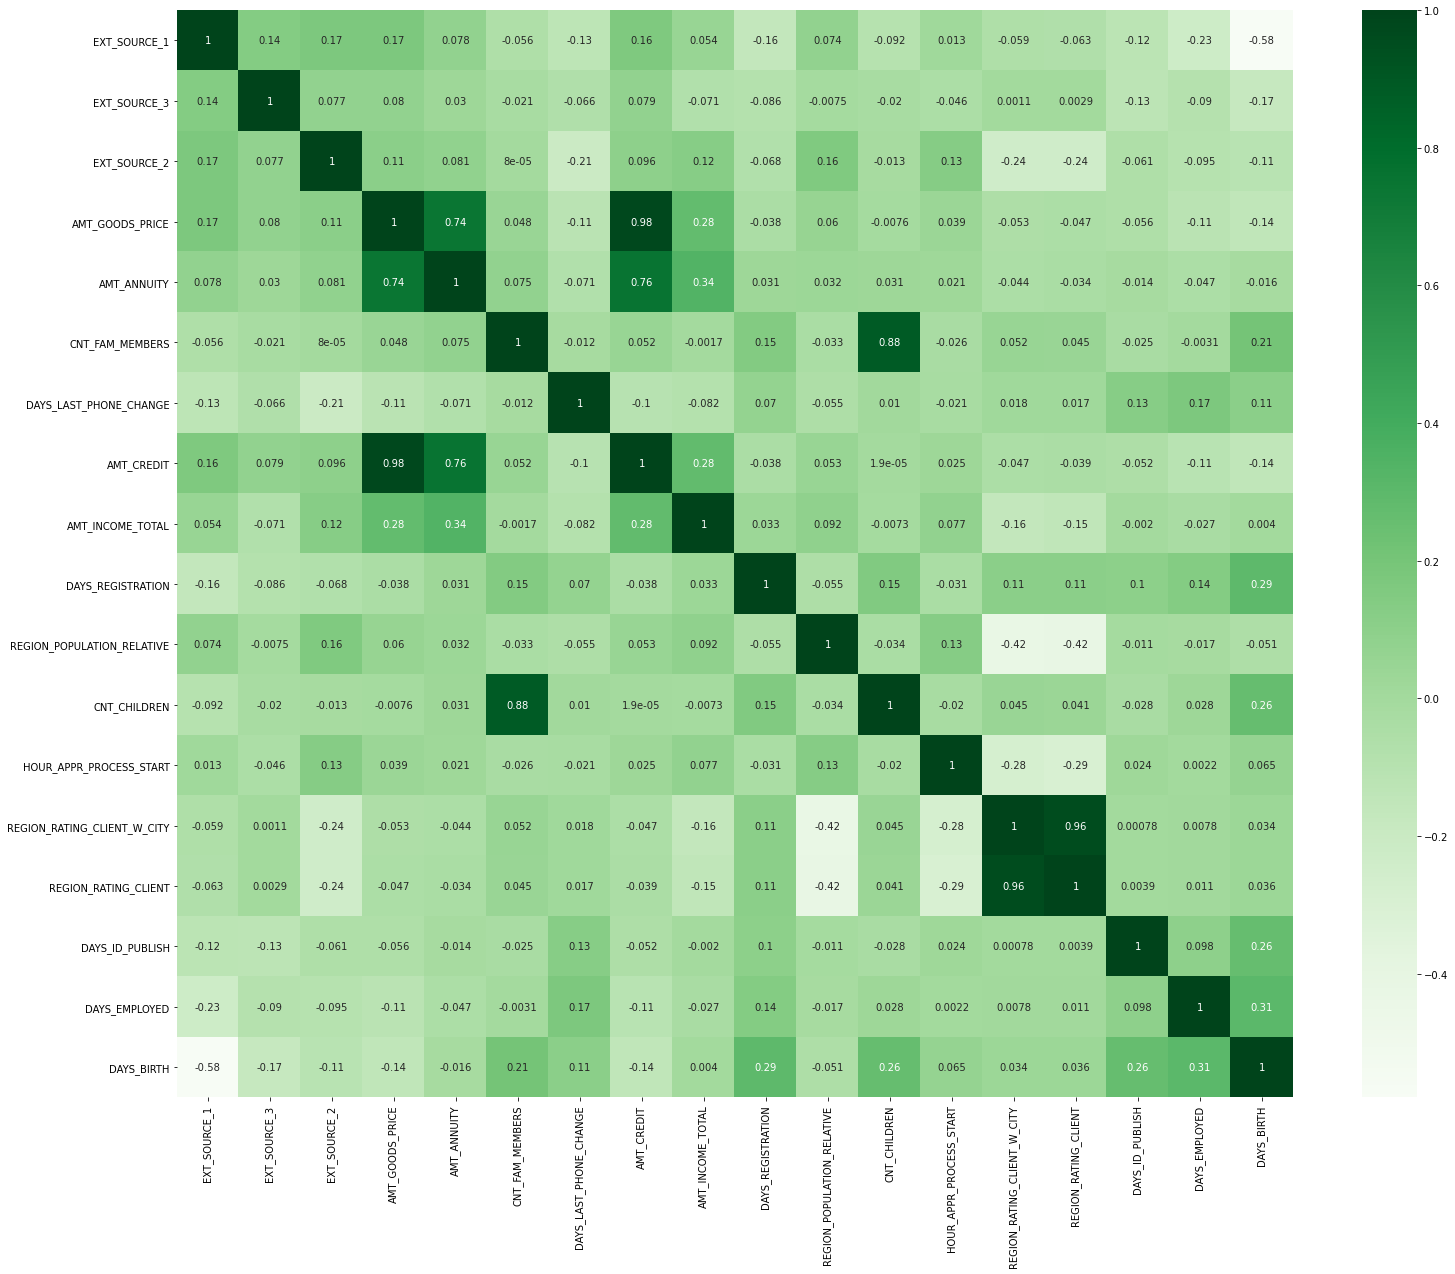

In [62]:
# figure size
plt.figure(figsize=(25,20))

# heatmap
sns.heatmap(defaulters_correlation, cmap="Greens", annot=True)
plt.show()

#### Here we can see that:

- AMT_CREDIT - AMT_GOODS_PRICE
- CNT_CHILDREN - CNT_FAM_MEMBERS

Have a good corellation, and
- REGION_RATING_CLIENT - HOUR_APPR_PROCESS_START
- REGION_POPULATION_RELATIVE - REGION_RATING_CLIENT
Have weak or negative corellation

In [63]:
nondefaulters_1=nondefaulters[cols]
nondefaulters_correlation = nondefaulters_1.corr()
round(nondefaulters_correlation, 3)

,EXT_SOURCE_1,EXT_SOURCE_3,EXT_SOURCE_2,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_FAM_MEMBERS,DAYS_LAST_PHONE_CHANGE,AMT_CREDIT,AMT_INCOME_TOTAL,DAYS_REGISTRATION,REGION_POPULATION_RELATIVE,CNT_CHILDREN,HOUR_APPR_PROCESS_START,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_ID_PUBLISH,DAYS_EMPLOYED,DAYS_BIRTH
EXT_SOURCE_1,1.000,0.171,0.189,0.141,0.075,-0.101,-0.130,0.135,0.052,-0.186,0.077,-0.140,0.020,-0.092,-0.093,-0.138,-0.251,-0.610
EXT_SOURCE_3,0.171,1.000,0.083,0.021,0.002,-0.028,-0.070,0.019,-0.102,-0.105,-0.009,-0.042,-0.045,-0.005,-0.007,-0.128,-0.120,-0.202
EXT_SOURCE_2,0.189,0.083,1.000,0.102,0.088,-0.003,-0.189,0.094,0.146,-0.053,0.180,-0.015,0.152,-0.271,-0.275,-0.042,-0.081,-0.078
AMT_GOODS_PRICE,0.141,0.021,0.102,1.000,0.777,0.057,-0.077,0.982,0.311,0.005,0.051,-0.003,0.050,-0.054,-0.050,-0.005,-0.087,-0.049
AMT_ANNUITY,0.075,0.002,0.088,0.777,1.000,0.074,-0.067,0.788,0.374,0.032,0.059,0.021,0.036,-0.082,-0.073,0.017,-0.047,0.015
CNT_FAM_MEMBERS,-0.101,-0.028,-0.003,0.057,0.074,1.000,-0.030,0.058,0.033,0.179,-0.025,0.876,-0.010,0.032,0.030,-0.017,0.031,0.290
DAYS_LAST_PHONE_CHANGE,-0.130,-0.070,-0.189,-0.077,-0.067,-0.030,1.000,-0.074,-0.058,0.052,-0.039,-0.009,-0.014,0.020,0.021,0.087,0.137,0.075
AMT_CREDIT,0.135,0.019,0.094,0.982,0.788,0.058,-0.074,1.000,0.310,0.002,0.047,0.001,0.040,-0.054,-0.049,-0.003,-0.086,-0.051
AMT_INCOME_TOTAL,0.052,-0.102,0.146,0.311,0.374,0.033,-0.058,0.310,1.000,0.076,0.153,0.031,0.084,-0.207,-0.189,0.033,-0.031,0.092
DAYS_REGISTRATION,-0.186,-0.105,-0.053,0.005,0.032,0.179,0.052,0.002,0.076,1.000,-0.050,0.190,-0.008,0.073,0.078,0.103,0.174,0.337


In [65]:
c2=nondefaulters_correlation.unstack()
c2.sort_values(ascending=False).drop_duplicates().head(10)

DAYS_BIRTH                   DAYS_BIRTH              1.000000
AMT_GOODS_PRICE              AMT_CREDIT              0.982300
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT    0.951842
CNT_CHILDREN                 CNT_FAM_MEMBERS         0.875910
AMT_CREDIT                   AMT_ANNUITY             0.787971
AMT_ANNUITY                  AMT_GOODS_PRICE         0.777270
                             AMT_INCOME_TOTAL        0.374166
DAYS_EMPLOYED                DAYS_BIRTH              0.353820
DAYS_BIRTH                   CNT_CHILDREN            0.340493
                             DAYS_REGISTRATION       0.336957
dtype: float64

In [66]:
c2.sort_values(ascending=False).drop_duplicates().tail(10)

EXT_SOURCE_3                 DAYS_BIRTH                    -0.201521
REGION_RATING_CLIENT_W_CITY  AMT_INCOME_TOTAL              -0.206793
EXT_SOURCE_1                 DAYS_EMPLOYED                 -0.250615
HOUR_APPR_PROCESS_START      REGION_RATING_CLIENT_W_CITY   -0.256174
EXT_SOURCE_2                 REGION_RATING_CLIENT_W_CITY   -0.270836
REGION_RATING_CLIENT         EXT_SOURCE_2                  -0.275245
                             HOUR_APPR_PROCESS_START       -0.276454
REGION_POPULATION_RELATIVE   REGION_RATING_CLIENT_W_CITY   -0.502861
REGION_RATING_CLIENT         REGION_POPULATION_RELATIVE    -0.503572
DAYS_BIRTH                   EXT_SOURCE_1                  -0.610357
dtype: float64

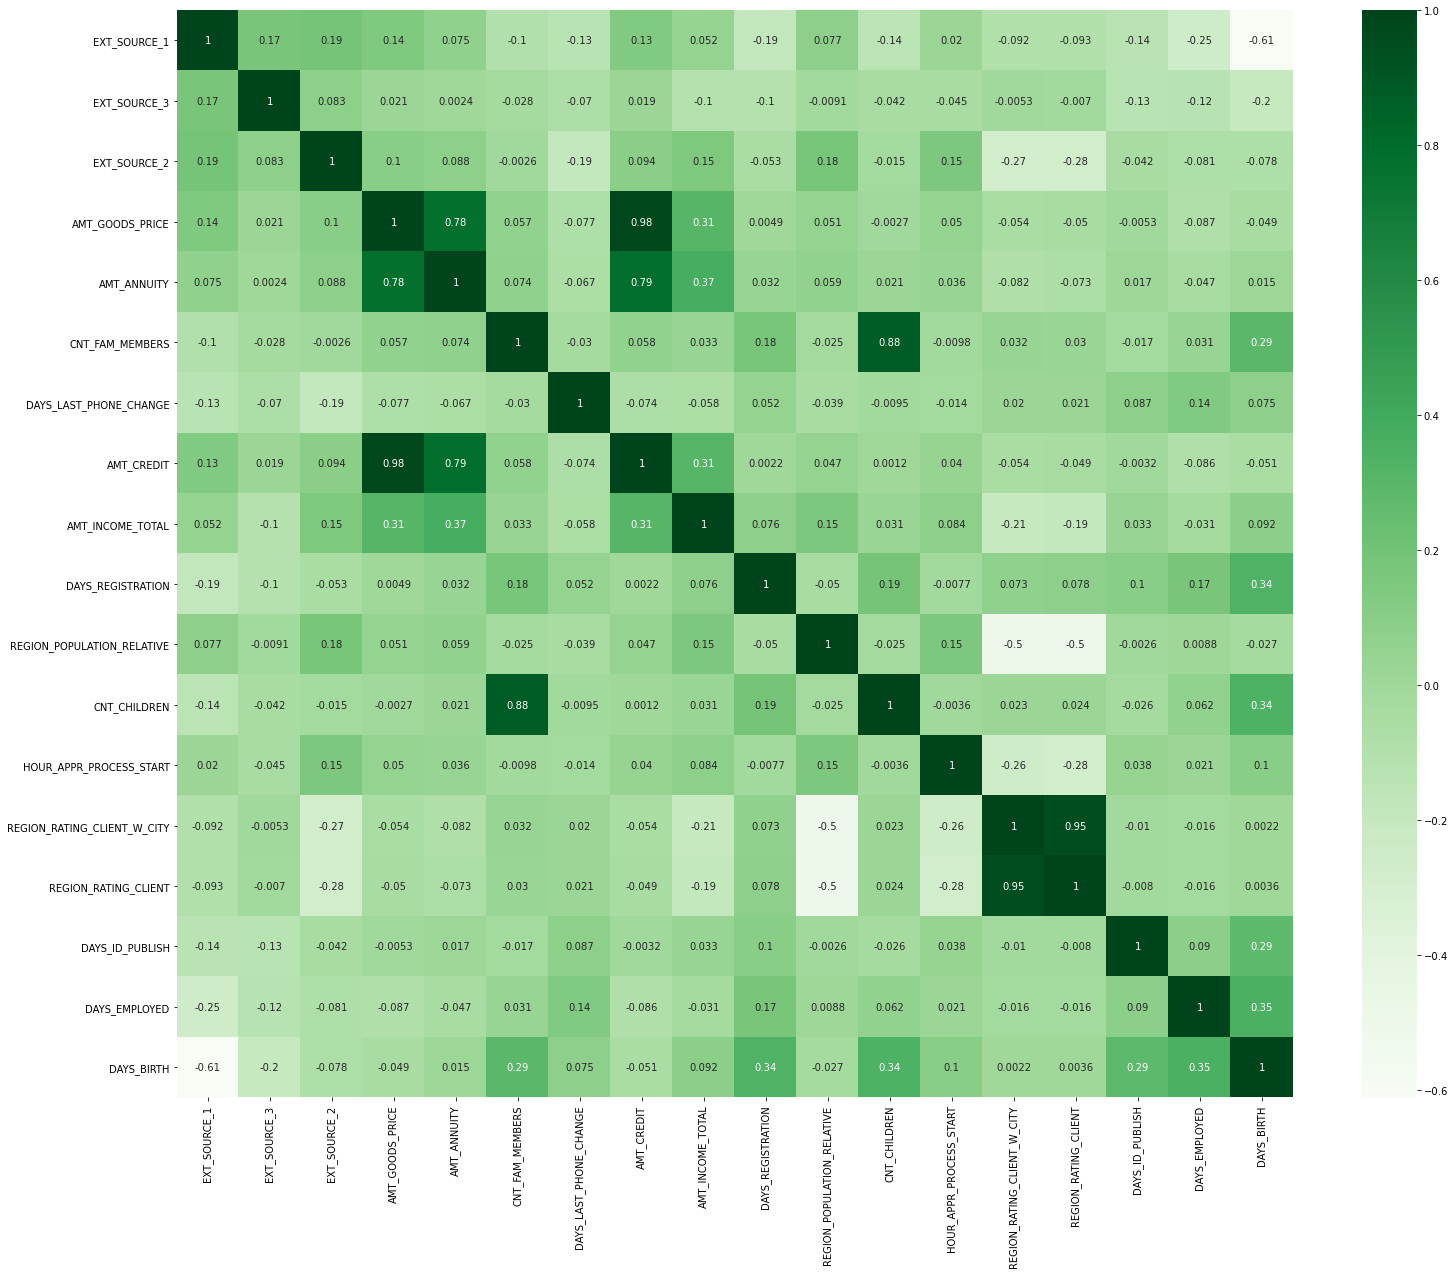

In [67]:
##### figure size
plt.figure(figsize=(25,20))

# heatmap
sns.heatmap(nondefaulters_correlation, cmap="Greens", annot=True)
plt.show()

##  Analysis of Previous Application Dataset

In [68]:
#importing data from CSV file into pandas dataframe
previous = pd.read_csv(r'C:\Users\HP\Downloads\Python Upgrad\Anaconda Jupyter\previous_application.csv')
previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
previous.shape

(1670214, 37)

In [70]:
application.dtypes.value_counts()

object     47
float64    46
int64       8
dtype: int64

In [71]:
previous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [72]:
previous.NAME_CONTRACT_STATUS.unique()

array(['Approved', 'Refused', 'Canceled', 'Unused offer'], dtype=object)

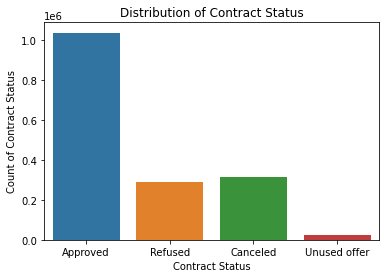

In [73]:
sns.countplot(previous.NAME_CONTRACT_STATUS)
plt.xlabel("Contract Status")
plt.ylabel("Count of Contract Status")
plt.title("Distribution of Contract Status")
plt.show()

#### Identifying missing values and filtering out columns with high missing values

In [81]:
prev_meta_data=data_structure(previous)
prev_meta_data.reset_index(drop=False).head(20)

,index,Total,Percent,Unique,Data_Type
0,AMT_DOWN_PAYMENT,895844,53.636480,29278,float64
1,RATE_DOWN_PAYMENT,895844,53.636480,207033,float64
2,NAME_TYPE_SUITE,820405,49.119754,7,object
3,NFLAG_INSURED_ON_APPROVAL,673065,40.298129,2,float64
4,DAYS_TERMINATION,673065,40.298129,2830,float64
5,DAYS_LAST_DUE,673065,40.298129,2873,float64
6,DAYS_LAST_DUE_1ST_VERSION,673065,40.298129,4605,float64
7,DAYS_FIRST_DUE,673065,40.298129,2892,float64
8,DAYS_FIRST_DRAWING,673065,40.298129,2838,float64
9,AMT_GOODS_PRICE,385515,23.081773,93885,float64


In [89]:
#dropping columns with more than 55% missing values 
cols_to_keep=list(prev_meta_data[(prev_meta_data.Percent<55)].index)
previous=previous[cols_to_keep]
previous.describe()

,AMT_DOWN_PAYMENT,RATE_DOWN_PAYMENT,NFLAG_INSURED_ON_APPROVAL,DAYS_TERMINATION,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,DAYS_FIRST_DRAWING,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT,AMT_CREDIT,AMT_APPLICATION,SK_ID_CURR,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,SK_ID_PREV
count,7.743700e+05,774370.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,1.284699e+06,1.297979e+06,1.297984e+06,1.670213e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06
mean,6.697402e+03,0.079637,0.332570,81992.343838,76582.403064,33767.774054,13826.269337,342209.855039,2.278473e+05,1.595512e+04,1.605408e+01,1.961140e+05,1.752339e+05,2.783572e+05,1.248418e+01,9.964675e-01,-8.806797e+02,3.139511e+02,1.923089e+06
std,2.092150e+04,0.107823,0.471134,153303.516729,149647.415123,106857.034789,72444.869708,88916.115834,3.153966e+05,1.478214e+04,1.456729e+01,3.185746e+05,2.927798e+05,1.028148e+05,3.334028e+00,5.932963e-02,7.790997e+02,7.127443e+03,5.325980e+05
min,-9.000000e-01,-0.000015,0.000000,-2874.000000,-2889.000000,-2801.000000,-2892.000000,-2922.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000010e+05,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00,1.000001e+06
25%,0.000000e+00,0.000000,0.000000,-1270.000000,-1314.000000,-1242.000000,-1628.000000,365243.000000,5.084100e+04,6.321780e+03,6.000000e+00,2.416050e+04,1.872000e+04,1.893290e+05,1.000000e+01,1.000000e+00,-1.300000e+03,-1.000000e+00,1.461857e+06
50%,1.638000e+03,0.051605,0.000000,-499.000000,-537.000000,-361.000000,-831.000000,365243.000000,1.123200e+05,1.125000e+04,1.200000e+01,8.054100e+04,7.104600e+04,2.787145e+05,1.200000e+01,1.000000e+00,-5.810000e+02,3.000000e+00,1.923110e+06
75%,7.740000e+03,0.108909,1.000000,-44.000000,-74.000000,129.000000,-411.000000,365243.000000,2.340000e+05,2.065842e+04,2.400000e+01,2.164185e+05,1.803600e+05,3.675140e+05,1.500000e+01,1.000000e+00,-2.800000e+02,8.200000e+01,2.384280e+06
max,3.060045e+06,1.000000,1.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,6.905160e+06,4.180581e+05,8.400000e+01,6.905160e+06,6.905160e+06,4.562550e+05,2.300000e+01,1.000000e+00,-1.000000e+00,4.000000e+06,2.845382e+06


In [90]:
cols_to_convert=list(prev_meta_data[(prev_meta_data.Unique==2)&((prev_meta_data.Data_Type=="int64")|(prev_meta_data.Data_Type=="float64"))].index)
cols_to_convert

['NFLAG_INSURED_ON_APPROVAL', 'NFLAG_LAST_APPL_IN_DAY']

In [91]:
def convert_data(previous, cols_to_convert):
    for y in cols_to_convert:
        previous.loc[:,y].replace((0, 1), ('N', 'Y'), inplace=True)
    return previous
convert_data(previous, cols_to_convert)
previous.dtypes.value_counts()

object     18
float64    12
int64       5
dtype: int64

In [92]:
approved=previous[previous.NAME_CONTRACT_STATUS=='Approved']
refused=previous[previous.NAME_CONTRACT_STATUS=='Refused']
canceled=previous[previous.NAME_CONTRACT_STATUS=='Canceled']
unused=previous[previous.NAME_CONTRACT_STATUS=='Unused Offer']

In [93]:
percentage_approved=(len(approved)*100)/len(previous)
percentage_refused=(len(refused)*100)/len(previous)
percentage_canceled=(len(canceled)*100)/len(previous)
percentage_unused=(len(unused)*100)/len(previous)

print("Percentage of Approved loan:",round(percentage_approved,2),"%")
print("Percentage of Refused loan:",round(percentage_refused,2),"%")
print("Percentage of Canceled loan:",round(percentage_canceled,2),"%")
print("Percentage of Unused loan:",round(percentage_unused,2),"%")

Percentage of Approved loan: 62.07 %
Percentage of Refused loan: 17.4 %
Percentage of Canceled loan: 18.94 %
Percentage of Unused loan: 0.0 %


In [94]:
def plot_3charts(var, label_rotation,horizontal_layout):
    if(horizontal_layout):
        fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15,5))
    else:
        fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(15,30))
    
    s1=sns.countplot(ax=ax1,x=refused[var], data=refused, order= refused[var].value_counts().index,)
    ax1.set_title("Refused", fontsize=10)
    ax1.set_xlabel('%s' %var)
    ax1.set_ylabel("Count of Loans")
    if(label_rotation):
        s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    
    s2=sns.countplot(ax=ax2,x=approved[var], data=approved, order= approved[var].value_counts().index,)
    if(label_rotation):
        s2.set_xticklabels(s2.get_xticklabels(),rotation=90)
    ax2.set_xlabel('%s' %var)
    ax2.set_ylabel("Count of Loans")
    ax2.set_title("Approved", fontsize=10)
    
    
    s3=sns.countplot(ax=ax3,x=canceled[var], data=canceled, order= canceled[var].value_counts().index,)
    ax3.set_title("Canceled", fontsize=10)
    ax3.set_xlabel('%s' %var)
    ax3.set_ylabel("Count of Loans")
    if(label_rotation):
        s3.set_xticklabels(s3.get_xticklabels(),rotation=90)
    plt.show()

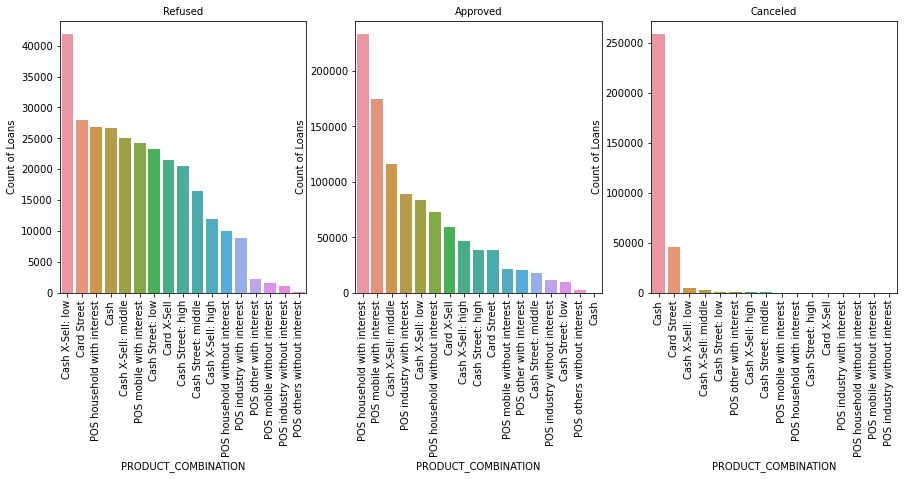

In [96]:
plot_3charts('PRODUCT_COMBINATION', label_rotation=True,horizontal_layout=True)

- We observe most number of loans were approved for POS household with interest.
- Most number of refused loans were of Cash X-Sell: Low Product combination
- Most Canceled loans were Cash loans

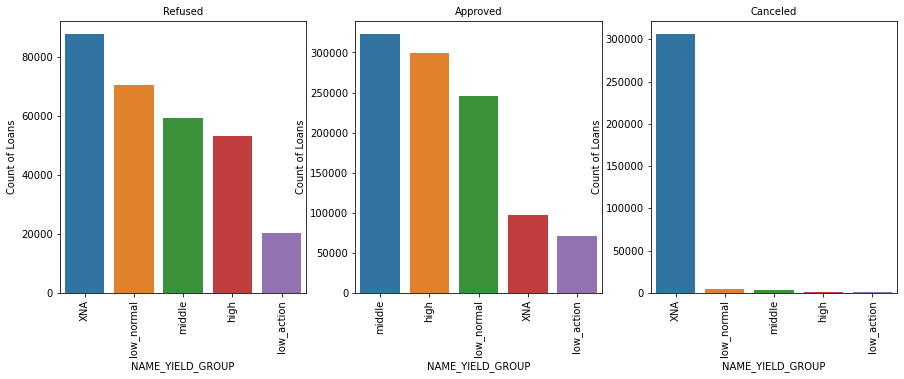

In [97]:
plot_3charts('NAME_YIELD_GROUP', label_rotation=True,horizontal_layout=True)

- Most approved loans were from **Middle** Yield Goup
- Most refused loans were from Yield Goups Not specified

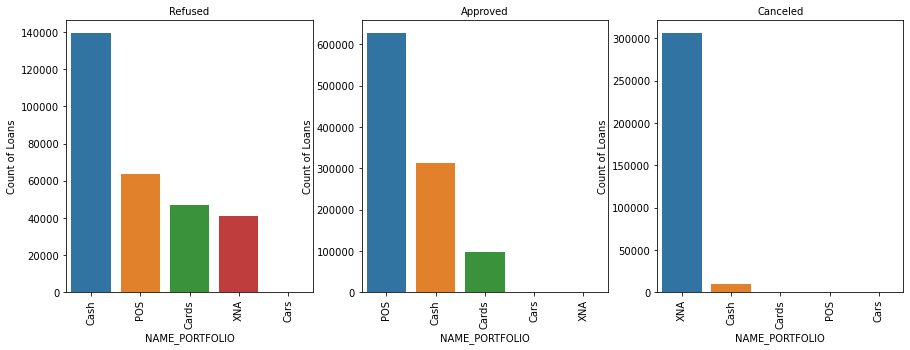

In [98]:
plot_3charts('NAME_PORTFOLIO', label_rotation=True,horizontal_layout=True)

- Most approved loans were **POS**
- Most refused loans were **Cash**

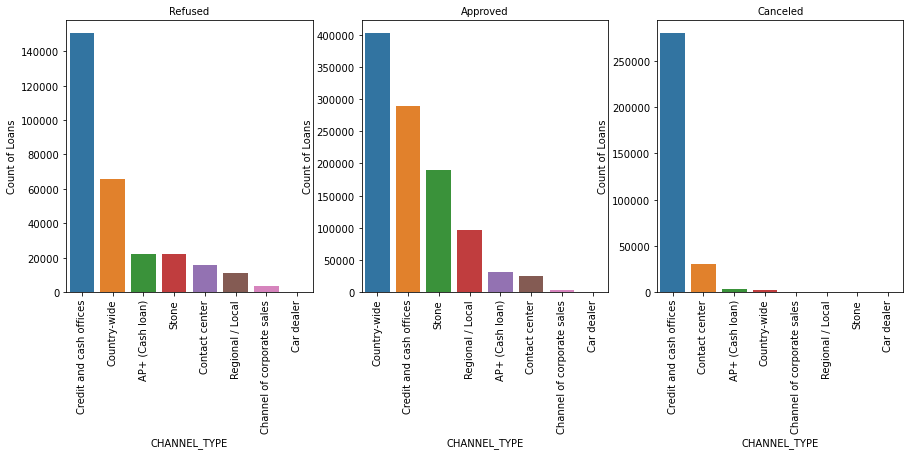

In [99]:
plot_3charts('CHANNEL_TYPE', label_rotation=True,horizontal_layout=True)

- Most approved loans were from **Country-wide** Channel
- Most refused loans were from **Credit and Cash Offices** Channel

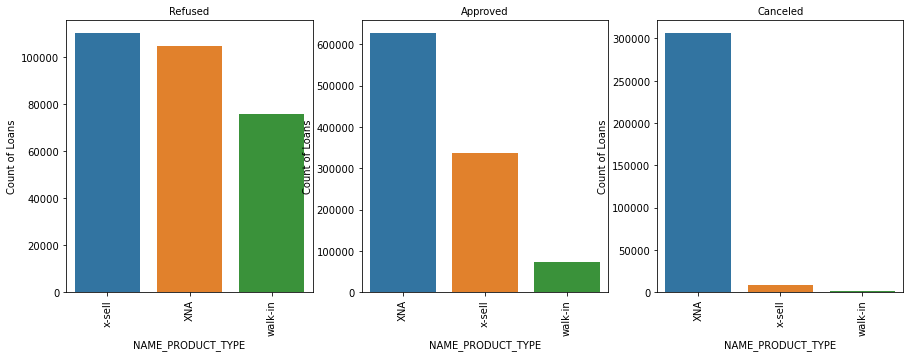

In [100]:
plot_3charts('NAME_PRODUCT_TYPE', label_rotation=True,horizontal_layout=True)

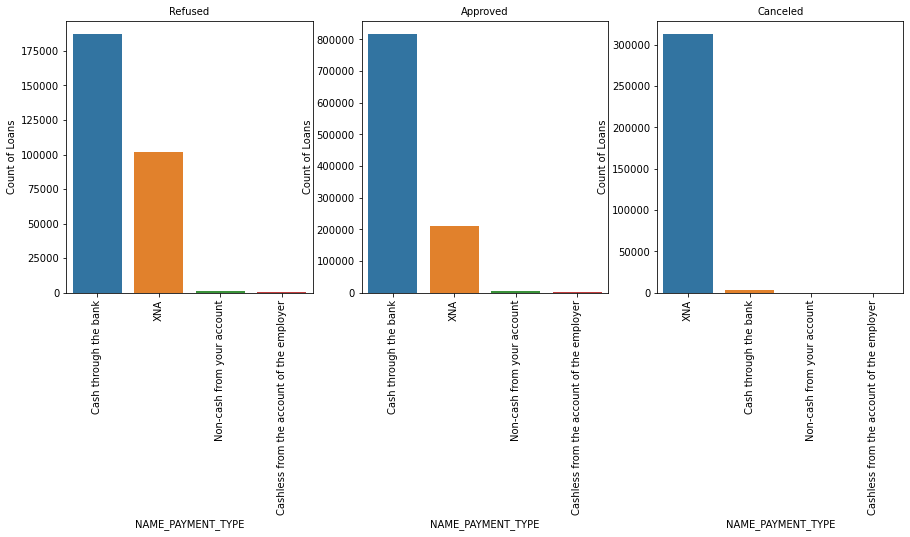

In [101]:
plot_3charts('NAME_PAYMENT_TYPE', label_rotation=True,horizontal_layout=True)

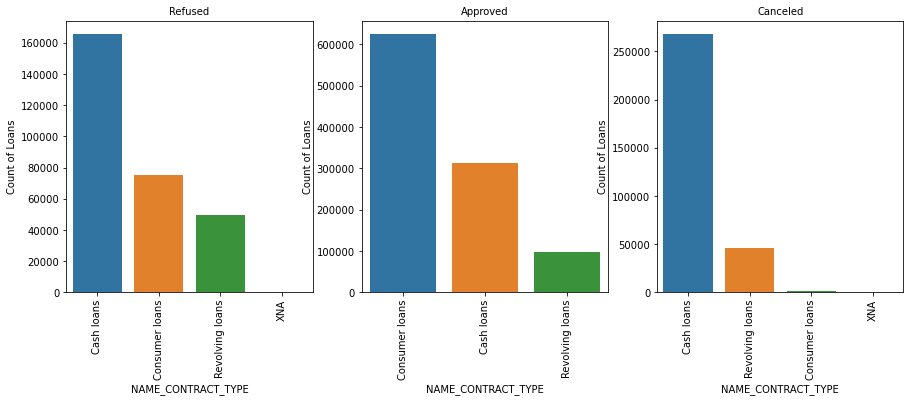

In [102]:
plot_3charts('NAME_CONTRACT_TYPE', label_rotation=True,horizontal_layout=True)

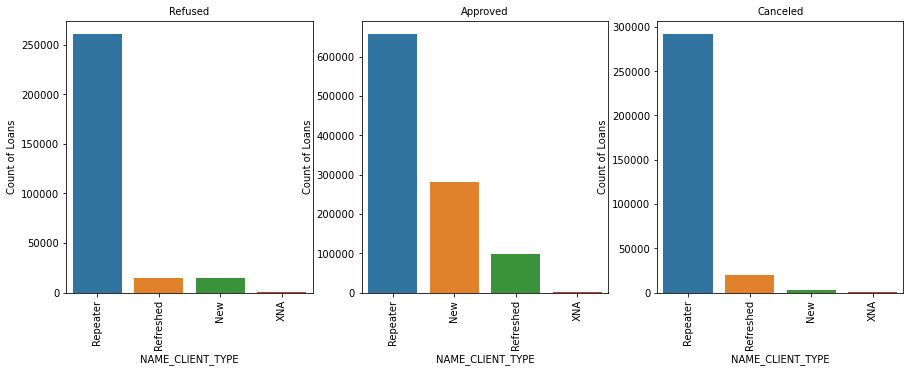

In [103]:
plot_3charts('NAME_CLIENT_TYPE', label_rotation=True,horizontal_layout=True)

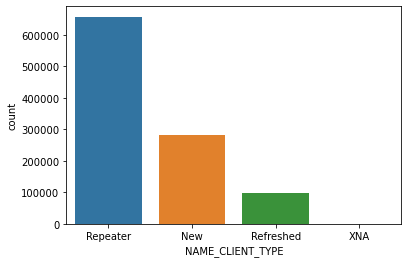

In [106]:
sns.countplot(x=approved['NAME_CLIENT_TYPE'], data=previous)
plt.show()

## Removing Outliers

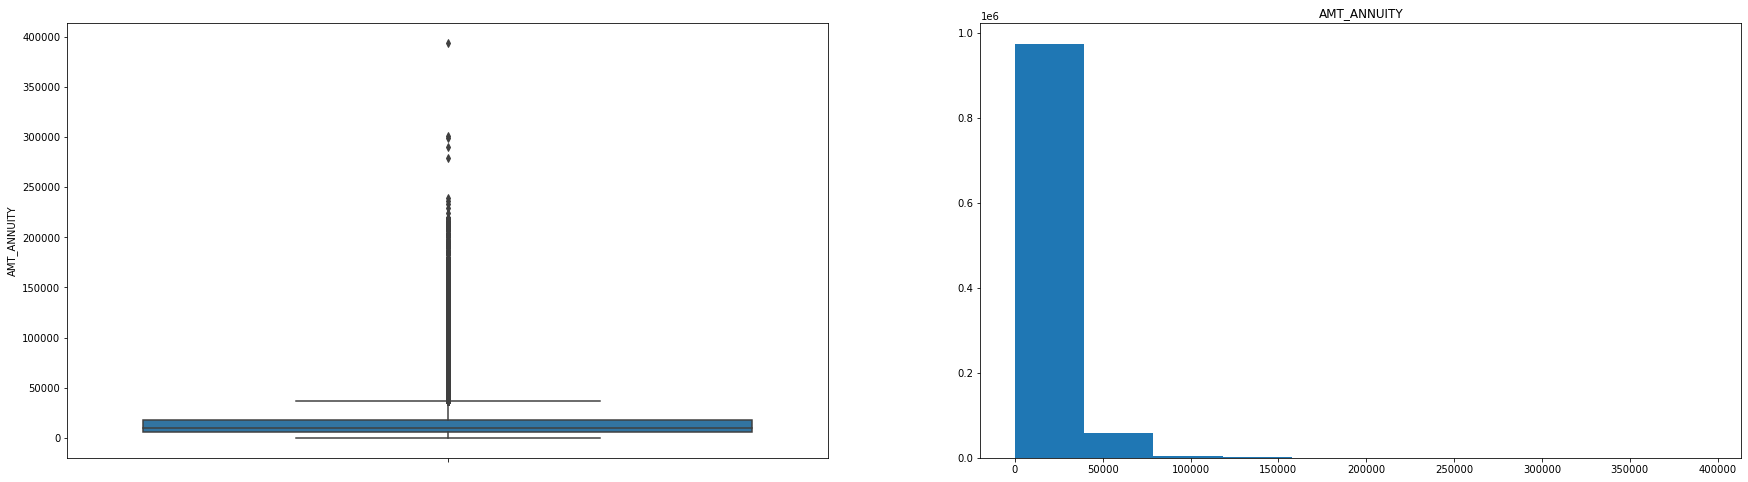

In [107]:
fig, ax = plt.subplots(figsize = (30, 8))
plt.subplot(1, 2, 1)
sns.boxplot(y=approved['AMT_ANNUITY']);
plt.subplot(1, 2, 2)
plt.hist(approved['AMT_ANNUITY'])
plt.title('AMT_ANNUITY')
plt.show()

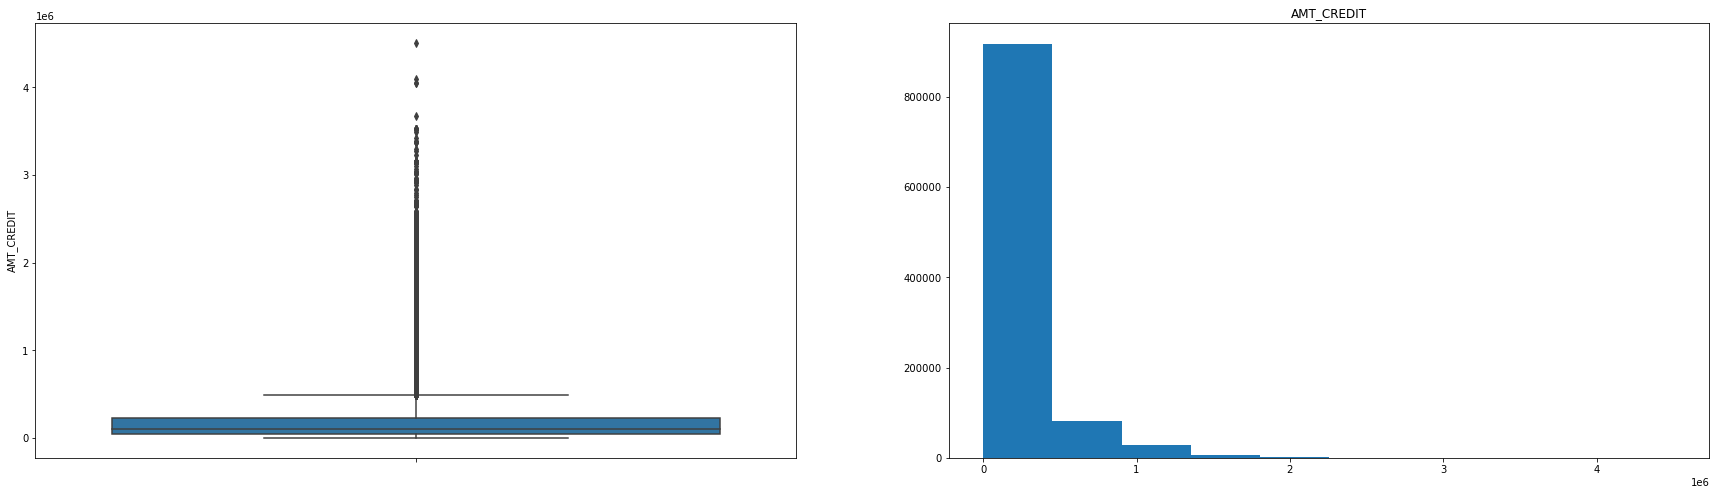

In [108]:
fig, ax = plt.subplots(figsize = (30, 8))
plt.subplot(1, 2, 1)
sns.boxplot(y=approved['AMT_CREDIT']);
plt.subplot(1, 2, 2)
plt.hist(approved['AMT_CREDIT'])
plt.title('AMT_CREDIT')
plt.show()

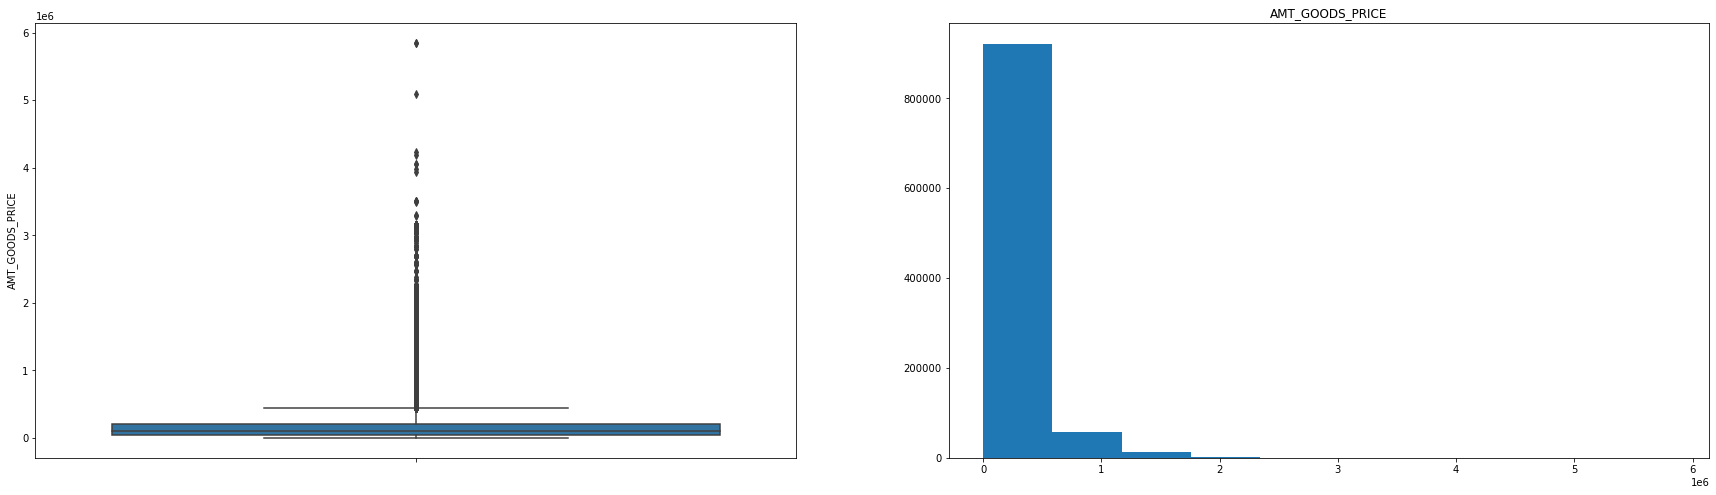

In [109]:
fig, ax = plt.subplots(figsize = (30, 8))
plt.subplot(1, 2, 1)
sns.boxplot(y=approved['AMT_GOODS_PRICE']);
plt.subplot(1, 2, 2)
plt.hist(approved['AMT_GOODS_PRICE'])
plt.title('AMT_GOODS_PRICE')
plt.show()

### BIVARIATE ANALYSIS OF VARIABLES

In [110]:
cols_approved=['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'DAYS_TERMINATION', 'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_FIRST_DUE', 'DAYS_FIRST_DRAWING', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_PAYMENT', 'AMT_CREDIT', 'DAYS_DECISION', 'AMT_APPLICATION']
approved_num=approved[cols_approved]


In [111]:
cols_refused=['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'CNT_PAYMENT', 'AMT_CREDIT', 'DAYS_DECISION', 'AMT_APPLICATION']
refused_num=refused[cols_refused]

In [112]:
#calculating correlation for approved
approved_correlation = approved_num.corr()
round(approved_correlation, 3)

,AMT_DOWN_PAYMENT,RATE_DOWN_PAYMENT,DAYS_TERMINATION,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,DAYS_FIRST_DRAWING,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT,AMT_CREDIT,DAYS_DECISION,AMT_APPLICATION
AMT_DOWN_PAYMENT,1.000,0.503,-0.031,-0.031,-0.001,-0.014,-0.002,0.459,0.258,0.006,0.267,-0.024,0.459
RATE_DOWN_PAYMENT,0.503,1.000,-0.145,-0.148,-0.011,-0.039,-0.008,-0.089,-0.105,-0.288,-0.217,-0.205,-0.089
DAYS_TERMINATION,-0.031,-0.145,1.000,0.928,0.493,0.324,-0.396,0.209,0.068,0.055,0.214,0.400,0.149
DAYS_LAST_DUE,-0.031,-0.148,0.928,1.000,0.423,0.402,-0.257,0.212,0.083,0.089,0.225,0.449,0.173
DAYS_LAST_DUE_1ST_VERSION,-0.001,-0.011,0.493,0.423,1.000,0.514,-0.803,0.017,-0.069,-0.381,0.044,0.089,-0.085
DAYS_FIRST_DUE,-0.014,-0.039,0.324,0.402,0.514,1.000,0.005,-0.021,-0.053,-0.205,0.003,0.177,-0.050
DAYS_FIRST_DRAWING,-0.002,-0.008,-0.396,-0.257,-0.803,0.005,1.000,-0.024,0.053,0.310,-0.037,-0.012,0.075
AMT_GOODS_PRICE,0.459,-0.089,0.209,0.212,0.017,-0.021,-0.024,1.000,0.831,0.636,0.993,0.255,1.000
AMT_ANNUITY,0.258,-0.105,0.068,0.083,-0.069,-0.053,0.053,0.831,1.000,0.344,0.826,0.255,0.814
CNT_PAYMENT,0.006,-0.288,0.055,0.089,-0.381,-0.205,0.310,0.636,0.344,1.000,0.626,0.189,0.646


In [113]:
c1=approved_correlation.unstack()
c1.sort_values(ascending=False).drop_duplicates().head(10)

AMT_APPLICATION   AMT_APPLICATION    1.000000
AMT_GOODS_PRICE   AMT_CREDIT         0.993244
AMT_CREDIT        AMT_APPLICATION    0.961757
DAYS_TERMINATION  DAYS_LAST_DUE      0.927990
AMT_ANNUITY       AMT_GOODS_PRICE    0.830859
                  AMT_CREDIT         0.826005
                  AMT_APPLICATION    0.814343
CNT_PAYMENT       AMT_APPLICATION    0.645581
                  AMT_GOODS_PRICE    0.635505
AMT_CREDIT        CNT_PAYMENT        0.626292
dtype: float64

In [114]:
c1.sort_values(ascending=False).drop_duplicates().tail(10)

DAYS_TERMINATION           RATE_DOWN_PAYMENT           -0.145461
DAYS_LAST_DUE              RATE_DOWN_PAYMENT           -0.147562
CNT_PAYMENT                DAYS_FIRST_DUE              -0.204907
RATE_DOWN_PAYMENT          DAYS_DECISION               -0.205263
                           AMT_CREDIT                  -0.216551
DAYS_FIRST_DRAWING         DAYS_LAST_DUE               -0.257466
CNT_PAYMENT                RATE_DOWN_PAYMENT           -0.287845
                           DAYS_LAST_DUE_1ST_VERSION   -0.381013
DAYS_FIRST_DRAWING         DAYS_TERMINATION            -0.396284
DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DRAWING          -0.803494
dtype: float64

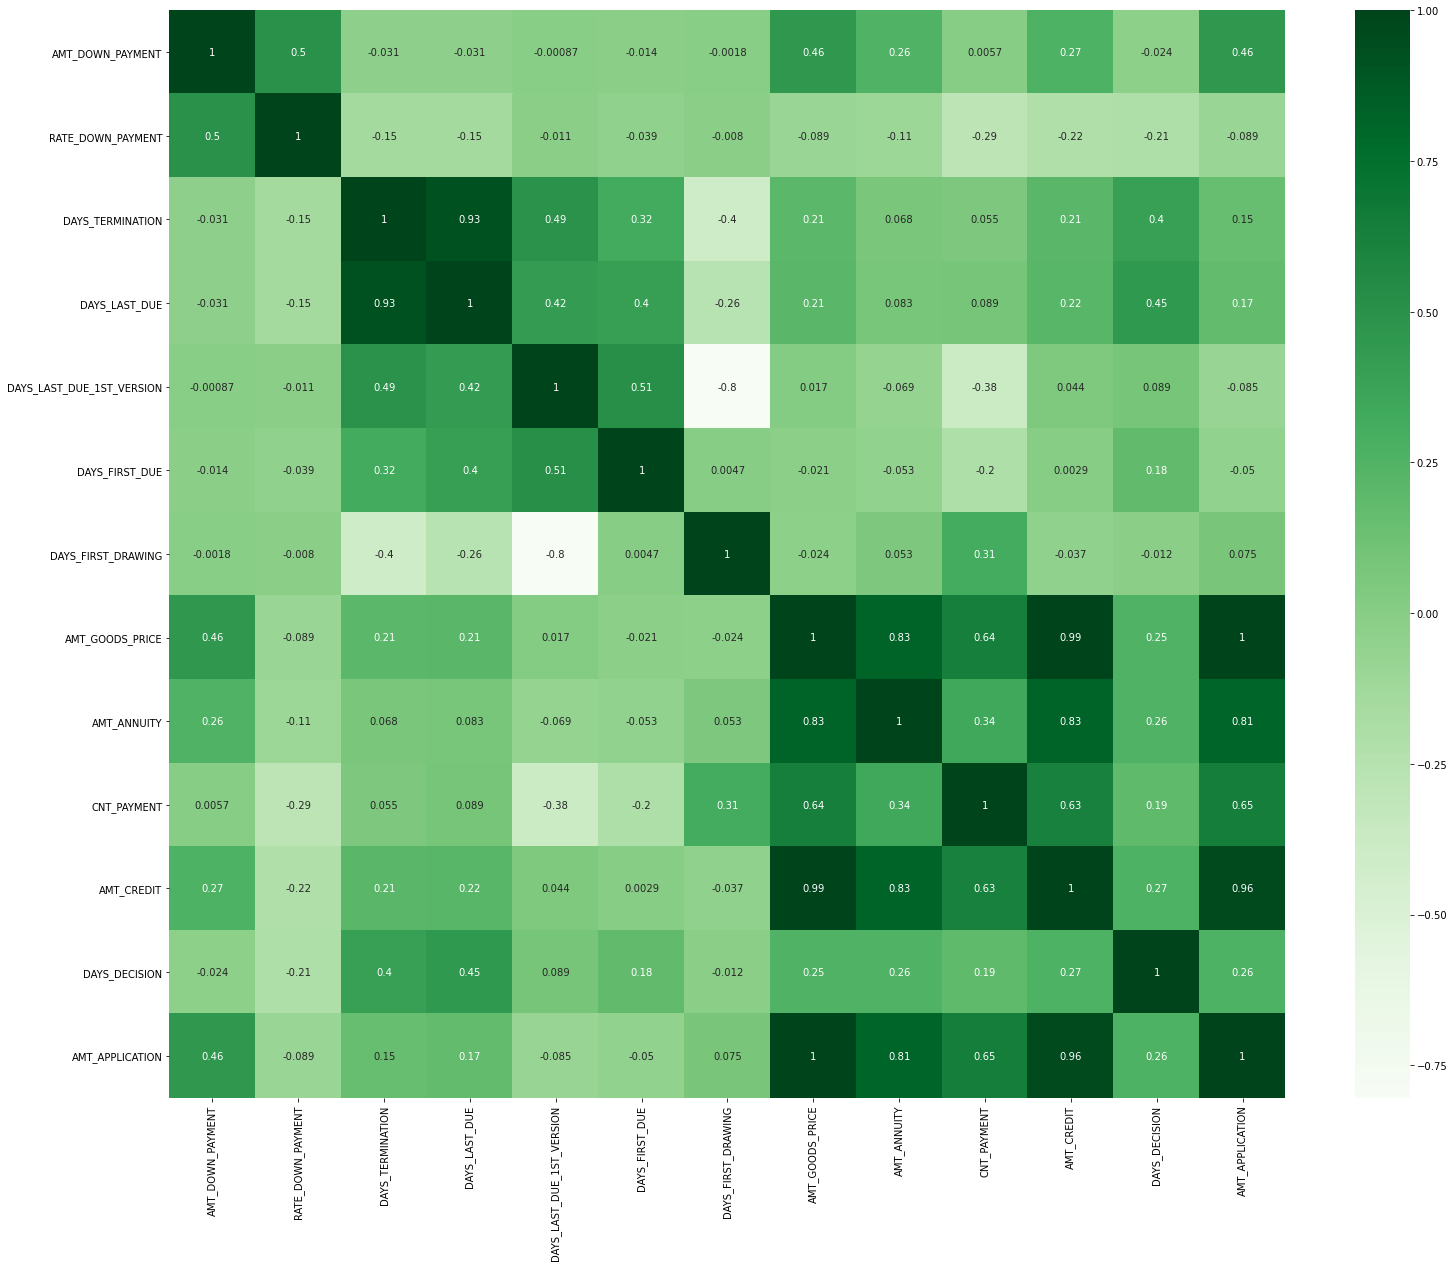

In [115]:
# figure size
plt.figure(figsize=(25,20))

# heatmap
sns.heatmap(approved_correlation, cmap="Greens", annot=True)
plt.show()

In [116]:
#calculating correlation for approved
refused_correlation = refused_num.corr()
round(refused_correlation, 3)

,AMT_DOWN_PAYMENT,RATE_DOWN_PAYMENT,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT,AMT_CREDIT,DAYS_DECISION,AMT_APPLICATION
AMT_DOWN_PAYMENT,1.000,0.416,0.536,0.317,0.095,0.386,0.008,0.536
RATE_DOWN_PAYMENT,0.416,1.000,-0.024,-0.084,-0.242,-0.112,-0.225,-0.024
AMT_GOODS_PRICE,0.536,-0.024,1.000,0.823,0.658,0.992,0.334,1.000
AMT_ANNUITY,0.317,-0.084,0.823,1.000,0.427,0.820,0.287,0.818
CNT_PAYMENT,0.095,-0.242,0.658,0.427,1.000,0.677,0.306,0.670
AMT_CREDIT,0.386,-0.112,0.992,0.820,0.677,1.000,0.270,0.984
DAYS_DECISION,0.008,-0.225,0.334,0.287,0.306,0.270,1.000,0.265
AMT_APPLICATION,0.536,-0.024,1.000,0.818,0.670,0.984,0.265,1.000


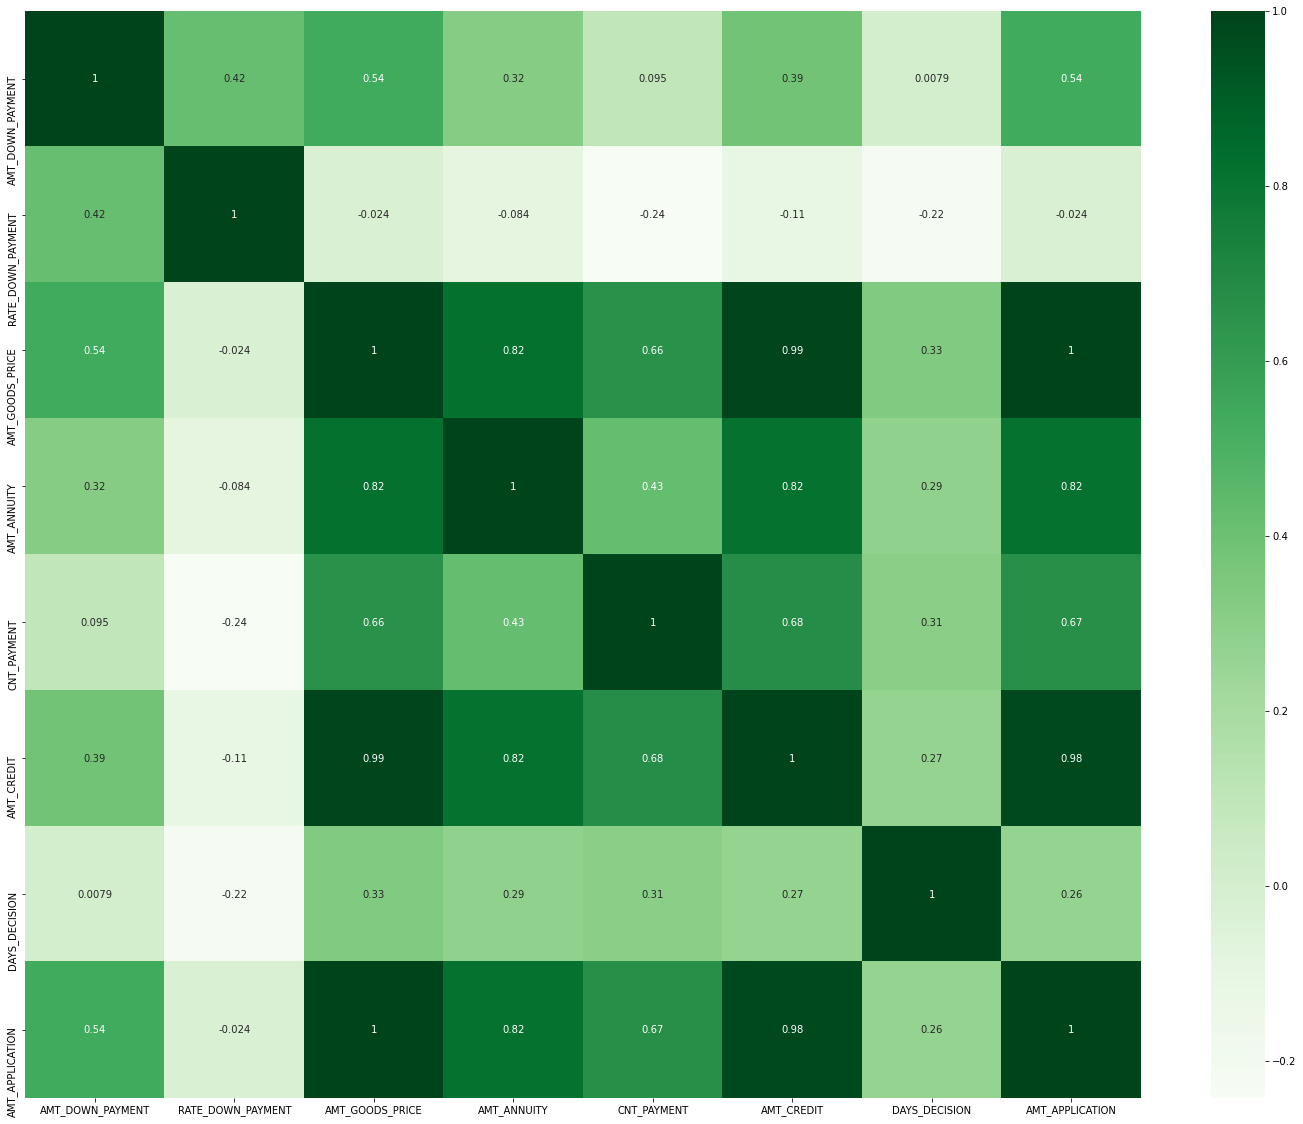

In [117]:
# figure size
plt.figure(figsize=(25,20))

# heatmap
sns.heatmap(refused_correlation, cmap="Greens", annot=True)
plt.show()

In [118]:
c2=refused_correlation.unstack()
c2.sort_values(ascending=False).drop_duplicates().head(10)

AMT_APPLICATION  AMT_APPLICATION    1.000000
AMT_GOODS_PRICE  AMT_APPLICATION    0.999699
                 AMT_CREDIT         0.991777
AMT_APPLICATION  AMT_CREDIT         0.983785
AMT_GOODS_PRICE  AMT_ANNUITY        0.822538
AMT_CREDIT       AMT_ANNUITY        0.819867
AMT_APPLICATION  AMT_ANNUITY        0.817869
AMT_CREDIT       CNT_PAYMENT        0.677433
AMT_APPLICATION  CNT_PAYMENT        0.669782
CNT_PAYMENT      AMT_GOODS_PRICE    0.658065
dtype: float64

In [119]:
c2.sort_values(ascending=False).drop_duplicates().tail(10)

DAYS_DECISION      AMT_ANNUITY          0.286620
                   AMT_CREDIT           0.270099
                   AMT_APPLICATION      0.264581
AMT_DOWN_PAYMENT   CNT_PAYMENT          0.094697
DAYS_DECISION      AMT_DOWN_PAYMENT     0.007927
AMT_APPLICATION    RATE_DOWN_PAYMENT   -0.023624
AMT_ANNUITY        RATE_DOWN_PAYMENT   -0.084484
RATE_DOWN_PAYMENT  AMT_CREDIT          -0.111684
                   DAYS_DECISION       -0.224665
                   CNT_PAYMENT         -0.242238
dtype: float64

In [120]:
def has_terminated(x):
    if x < 0:
        return 'Loan Terminated'
    else:
        return 'Loan Open'
    
approved['CURRENT_STATUS'] = approved['DAYS_TERMINATION'].apply(has_terminated) 

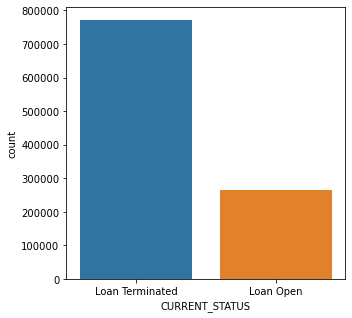

In [121]:
plt.figure(figsize=(5,5))
sns.countplot(x=approved['CURRENT_STATUS'], data=approved)
plt.show()

In [122]:
new_df= previous.pivot_table(values = 'NAME_CONTRACT_STATUS', index = 'SK_ID_CURR', aggfunc = 'count')
new_df=new_df.reset_index(drop=False)
new_df.rename(columns = {'NAME_CONTRACT_STATUS':'Count of Refused Loans'}, inplace = True)

In [123]:
merged_df1=pd.merge(new_df, pd.DataFrame(application[['SK_ID_CURR','TARGET']]), how='inner', on='SK_ID_CURR')

In [124]:
merged_df1=merged_df1[merged_df1['Count of Refused Loans']!=0]

In [125]:
merged_df1.head()

,SK_ID_CURR,Count of Refused Loans,TARGET
0,100002,1,1
1,100003,3,0
2,100004,1,0
3,100006,9,0
4,100007,6,0


In [126]:
merged_df1[merged_df1['TARGET']==0].head()

,SK_ID_CURR,Count of Refused Loans,TARGET
1,100003,3,0
2,100004,1,0
3,100006,9,0
4,100007,6,0
5,100008,5,0


#### After Completely analysing the given data. We can conclude that the below are the variables that are strongly pointing towards a likely defaulter
- EXT_SOURCE_1
- EXT_SOURCE_2
- EXT_SOURCE_3
- DAYS_BIRTH
- AMT_ANNUITY